In [50]:
''' Hybrid LSTM-RNN for Sound event detection

@ Author: Yikuan Chen
@ Created: Feb/2018
@ revision:Mar/2018
           Apr/2018
'''

import numpy as np
import matplotlib.pyplot as plt
from sound_detection_utils4 import *

In [46]:
def test_inference(Sxx_in,labels,R_Net,margin, listen=0,noise=0,biDir=0):
    
    result = []
    compare = []
    count, p_false,n_false, p_correct,n_correct = 0,0,0,0,0;
    is_scream = np.zeros(Sxx_in.shape[0]);
    output_label = np.zeros(Sxx_in.shape[0]);
    cont_count = 0;
    is_same = 0;
    
    num_continuous = 10; # number of contiguous consistent frame to enable activation

    # single layer
    for i in range(0,Sxx_in.shape[0]):  
        if(i > 0):
            output_label[i] = output_label[i-1];

        infer_in_enc = Sxx_in[i]

        is_scream[i] = R.get_prob(infer_in_enc)
        count += 1

        if(is_scream[i] >= 0.5 and is_scream[i-1]>=0.5):
            is_same = 1;
        elif(is_scream[i] < 0.5 and is_scream[i-1] < 0.5):
            is_same = 1;
        else:
            is_same = 0;
        if(is_same == 1):
            cont_count += 1
        else:
            cont_count = 0; # if change is detected, reset cont_count
        if(cont_count == num_continuous):
            if(is_scream[i] >= 0.5):
                for j in range(i-9,i+1):
                    output_label[j] = 1;
            else:
                for j in range(i-9,i+1):
                    output_label[j] = 0;

        compare.append(labels[i])

    for i in range(Sxx_in.shape[0]):
        if(labels[i] > 0.5):
            if(output_label[i] > 0.5):
                p_correct += 1; # true pos
            else:
                n_false += 1;   # false neg
        elif(labels[i] <= 0.5):
            if(output_label[i]<= 0.5 ):
                n_correct += 1; # true neg
            else:  
                p_false += 1;   # false pos

    print("True Pos=",p_correct,",True Neg=",n_correct,",False Pos=",p_false,",False Neg=",n_false)
    Precision = p_correct/(p_correct+p_false+1) # prevent divide by zero
    Recall = p_correct/(p_correct+n_false+1)
    Accuracy = (p_correct+n_correct)/(p_correct+p_false+n_false+n_correct)
    print("single layer: \naccuracy =",Accuracy*100,"%\nprecision =",Precision*100,"%")
    print("recall =",Recall*100,"%")
    print("F-measure =",2*Precision*Recall/(Precision+Recall+0.01)*100,"%")

    event_tpos, event_fpos, event_fneg = event_metric(output_label, labels, margin);                  
        
        
    plt.plot(compare)
    #plt.plot(result)
    #plt.show()
    plt.plot(is_scream)
    plt.show()
    plt.plot(output_label)
    plt.show()
    
    return event_tpos, event_fpos, event_fneg

Sxx.shape= (257, 5166)
t_begin= 3575 t_end= 3942
(5166, 257)


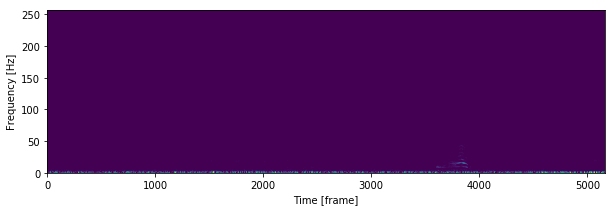

[  15.95771437  199.96334893  383.9689835   567.97461807  751.98025264
  935.98588721 1119.99152178 1303.99715635 1488.00279092 1672.00842549
 1856.01406005 2040.01969462 2224.02532919 2408.03096376 2592.03659833
 2776.0422329  2960.04786747 3144.05350204 3328.05913661 3512.06477117
 3696.07040574 3880.07604031 4064.08167488 4248.08730945 4432.09294402]
[  0.   1.   3.   5.   7.  10.  13.  17.  22.  28.  34.  42.  50.  61.
  73.  88. 105. 125. 149. 177. 210. 249. 295. 349. 412. 486.]


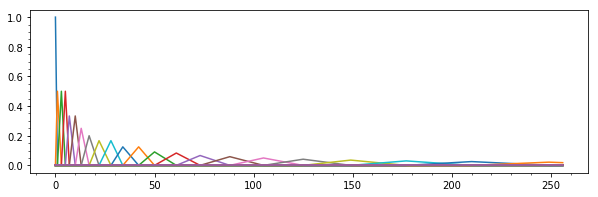

Test mfcc:
(5166, 25)


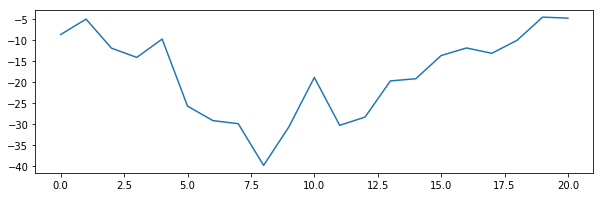

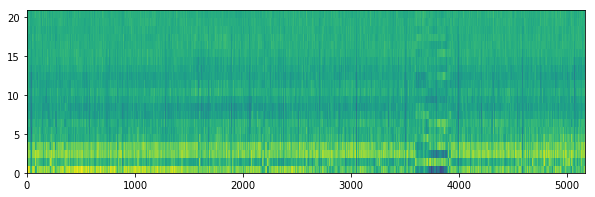

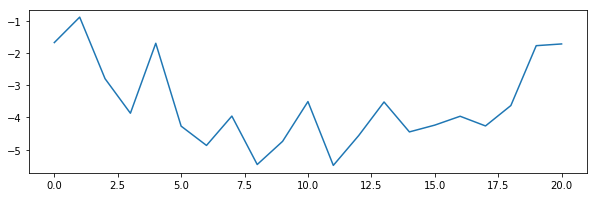

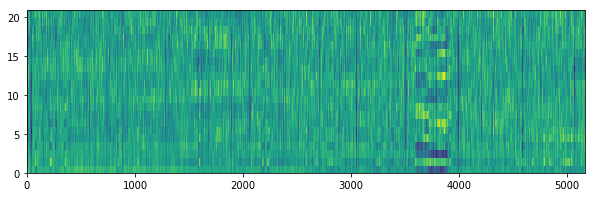

In [47]:
# mfcc test
num_bank = 25
#Sxx_in,labels,fs = audio_prep("./audio_set/scream_data/file_11001.wav","./audio_set/scream_text/file_11.txt",\
#                             plot=0,listen=0,nperseg=512,noverlap=256)
yaml_path = "audio_set\\DCASE\\devtrain\\20b255387a2d0cddc0a3dff5014875e7\\meta"
yaml_file = "mixture_recipes_devtrain_babycry.yaml"

audio_path = "audio_set\\DCASE\\devtrain\\20b255387a2d0cddc0a3dff5014875e7\\audio"
data = read_meta_yaml(yaml_path+"\\"+yaml_file)

Sxx_in,labels,fs = prep_from_yaml(data[1],audio_path,listen=0,noise=0,trunc = False,nperseg=512, noverlap=256)
f = np.linspace(start=0,stop=Sxx_in.shape[1],num =Sxx_in.shape[1])
t  = np.linspace(start=0,stop=Sxx_in.shape[0],num =Sxx_in.shape[0])

print(Sxx_in.shape)
plt.pcolormesh(t, f, np.log(Sxx_in.T+1e-8))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [frame]')
plt.show()

filter_bank = get_mfcc_filter_bank(Sxx_in[0:1],num_bank,fs)
plt.rcParams["figure.figsize"] = [10,3]
for i in range(num_bank):
    plt.plot(filter_bank[i])
plt.minorticks_on()
plt.show()
print("Test mfcc:")
test_mfcc = Sxxin_to_mfcc(Sxx_in,num_bank,fs,filter_bank)
test_mfcc = test_mfcc[:,2:num_bank-2]

plt.plot(test_mfcc[1600])
plt.show()
plt.pcolormesh(test_mfcc.T)
plt.show()

test_mfcc = mean_var_normalization(test_mfcc, byRow = False)

plt.plot(test_mfcc[1600])
plt.show()
plt.pcolormesh(test_mfcc.T)
plt.show()


Sxx.shape= (513, 2582)
t_begin= 1787 t_end= 1970

 {'segment_start_seconds': 13.76, 'annotation_string': 'mixture_devtrain_babycry_001_6c193b823c29f4ee33a8a8d892913803.wav\t20.75749831062934\t22.89749831062934\tbabycry', 'event_length_seconds': 2.1400000000000006, 'ebr': -6.0, 'mixture_audio_filename': 'mixture_devtrain_babycry_001_6c193b823c29f4ee33a8a8d892913803.wav', 'event_start_in_mixture_seconds': 20.75749831062934, 'bg_classname': 'train', 'event_present': True, 'segment_end_seconds': 15.9, 'scaling_factor': 0.12220660411143336, 'event_path': 'babycry/151081.wav', 'bg_path': 'audio/a144_60_90.wav', 'event_class': 'babycry'} 

[  15.95771437  129.19195102  242.42618768  355.66042434  468.894661
  582.12889765  695.36313431  808.59737097  921.83160763 1035.06584429
 1148.30008094 1261.5343176  1374.76855426 1488.00279092 1601.23702757
 1714.47126423 1827.70550089 1940.93973755 2054.17397421 2167.40821086
 2280.64244752 2393.87668418 2507.11092084 2620.34515749 2733.57939415
 2846.

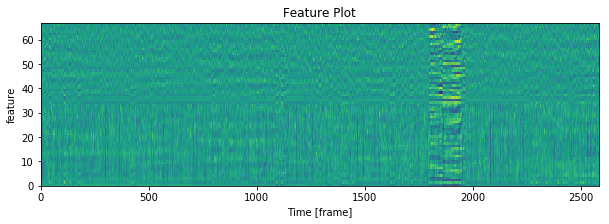


length of Input = 67 
length of Out = 2 
Input that goes to Rec neurons = 33 
num of Recurrent neurons= 66 
Recurrent Times= 100


In [52]:
epoch = 30*1000;
#Sxx_spec,labels,fs = audio_prep("./audio_set/scream_data/file_00001.wav",\
#                                "./audio_set/scream_text/file_00.txt",\
#                                plot=1,listen=1,noise=0,nperseg=512,noverlap=256)
train_yaml_path = "audio_set\\DCASE\\devtrain\\20b255387a2d0cddc0a3dff5014875e7\\meta"
train_yaml_file = "mixture_recipes_devtrain_babycry.yaml"
train_audio_path = "audio_set\\DCASE\\devtrain\\20b255387a2d0cddc0a3dff5014875e7\\audio"

cross_train_yaml_path = "audio_set\\DCASE\\devtrain\\20b255387a2d0cddc0a3dff5014875e7\\meta"
cross_train_yaml_file = "mixture_recipes_devtrain_gunshot.yaml"
cross_train_audio_path = "audio_set\\DCASE\\devtrain\\20b255387a2d0cddc0a3dff5014875e7\\audio"

test_yaml_path = "audio_set\\DCASE\\devtest\\20b255387a2d0cddc0a3dff5014875e7\\meta"
test_yaml_file = "mixture_recipes_devtest_babycry.yaml"
test_audio_path = "audio_set\\DCASE\\devtest\\20b255387a2d0cddc0a3dff5014875e7\\audio"

train_data = read_meta_yaml(train_yaml_path +"\\" + train_yaml_file)
test_data  = read_meta_yaml( test_yaml_path +"\\" +  test_yaml_file)
#print(test_data)

cross_train_data = read_meta_yaml(cross_train_yaml_path +"\\" + cross_train_yaml_file)

Sxx_spec,labels,fs = prep_from_yaml(train_data[1],audio_path,listen=0,noise=0,trunc = False,nperseg=1024, noverlap=512)
print("\n",train_data[1],"\n")

# Generate filter bank
num_bank = 40
filter_bank = get_mfcc_filter_bank(Sxx_spec[0:1],num_bank,fs)

# Generate Feature
diff = True
diff_diff = False
Sxx_mfcc_raw = Sxxin_to_mfcc(Sxx_spec,num_bank,fs,filter_bank)
Sxx_in = feature_for_sound(Sxx_mfcc_raw,num_bank,diff_by_time= False, diff= diff, diff_diff = diff_diff)
Sxx_in = mean_var_normalization(Sxx_in,byRow = False)

plt.pcolormesh(Sxx_in.T)
plt.title("Feature Plot")
plt.ylabel('feature')
plt.xlabel('Time [frame]')
plt.show()


# Hyper params
lenIn          = Sxx_in.shape[1]
lenOut         = 2
lenRec         = min(100,max(min(100,Sxx_in.shape[0]),int(Sxx_in.shape[0]/5)))
sizeHidden     = int(lenIn*2)
lenInRec       = int(Sxx_in.shape[1])
if(diff == True and diff_diff == False):
    lenInRec       = int(Sxx_in.shape[1]/2)
elif(diff == True and diff_diff == True):
    lenInRec       = int(Sxx_in.shape[1]/3)
    
hiddenRec      = int(lenInRec*2)
numHiddenLayer = 1

learningRate = 0.1;
print("\nlength of Input =",lenIn, \
      "\nlength of Out =",lenOut,\
      "\nInput that goes to Rec neurons =",lenInRec,\
      "\nnum of Recurrent neurons=",hiddenRec,\
      "\nRecurrent Times=",lenRec)


In [53]:
#from LSTMbiDir import *
#from RNNbiDir import *
#from LSTMSingle import *
#from RNNSingle import *
from Hybrid_FF_LSTM_RNN_5 import *

Finish another 1,000 iterations!, now epoch =  18
one time, n= 317627
Sxx.shape= (513, 2582)
(2582, 40)


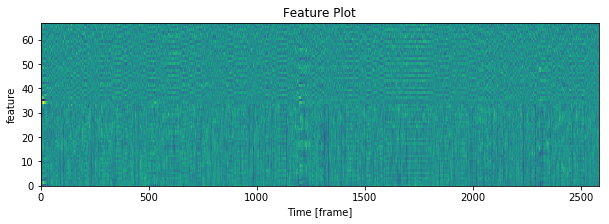

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 2571 ,False Pos= 11 ,False Neg= 0
single layer: 
accuracy = 99.5739736638265 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


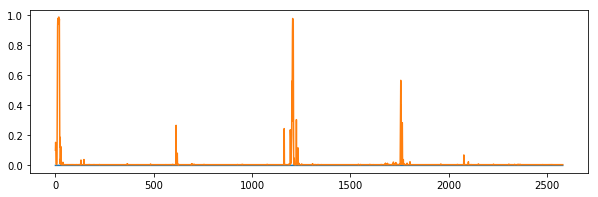

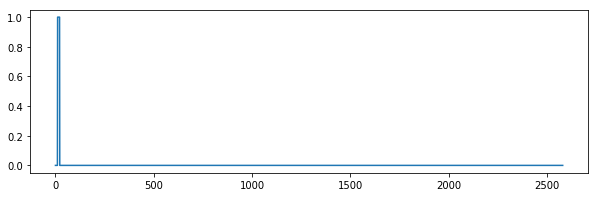

Current:event_tpos = 0 , event_fpos =  1 , event_fneg =  0
Total： event_tpos = 0 , event_fpos =  1 , event_fneg =  0
precision =  0.0 recall =  0.0 f_score =  0.0

###### same class train #######
Sxx.shape= (513, 2582)
t_begin= 975 t_end= 1246
(2582, 40)


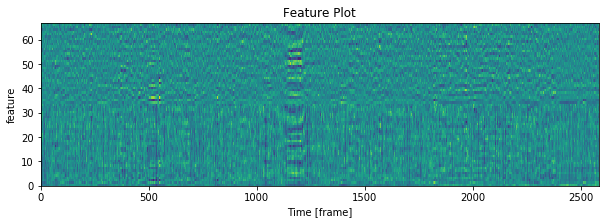

n = 317637 ,k updates! k =  400 New Sxx has length  2582
mixture_devtrain_babycry_400_f4a26dbdb0dfcf2124da69394ac3a2f1.wav
times: 0 n= 317637 err: -0.021885502407873045
LearningRate: 0.010000000068133943 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 0 ,True Neg= 2311 ,False Pos= 0 ,False Neg= 271
single layer: 
accuracy = 89.50426026336173 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


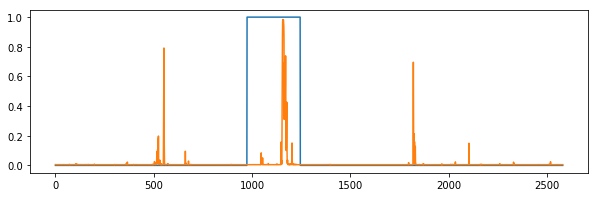

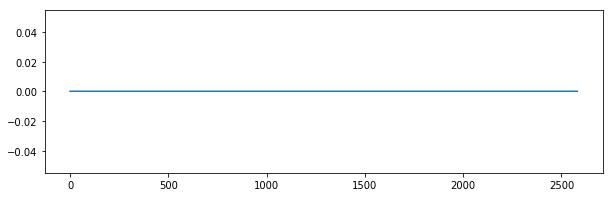

out = out[t-1]+prob* [0.92283154] - [0.67544009]
one time, n= 317662
times: 1 n= 317666 err: -0.015000035954657452
LearningRate: 0.010000000068133943 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 13 ,True Neg= 2311 ,False Pos= 0 ,False Neg= 258
single layer: 
accuracy = 90.00774593338498 %
precision = 92.85714285714286 %
recall = 4.779411764705882 %
F-measure = 8.998743370748226 %


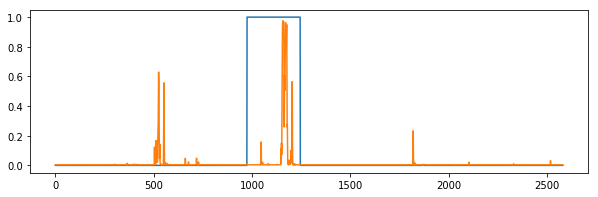

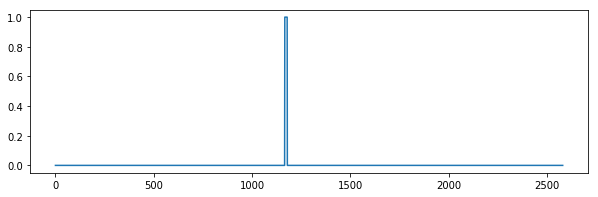

out = out[t-1]+prob* [0.8747365] - [0.71638448]
one time, n= 317687
Sxx.shape= (513, 2582)
(2582, 40)


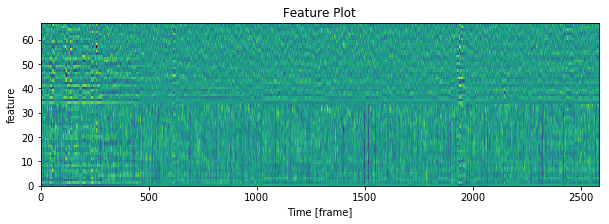

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 2568 ,False Pos= 14 ,False Neg= 0
single layer: 
accuracy = 99.4577846630519 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


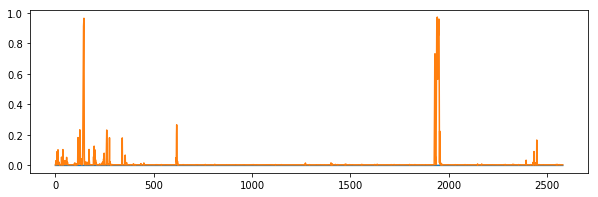

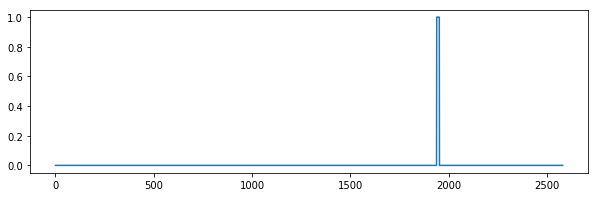

Current:event_tpos = 0 , event_fpos =  1 , event_fneg =  0
Total： event_tpos = 0 , event_fpos =  2 , event_fneg =  0
precision =  0.0 recall =  0.0 f_score =  0.0

###### same class train #######
Sxx.shape= (513, 2582)
t_begin= 1164 t_end= 1340
(2582, 40)


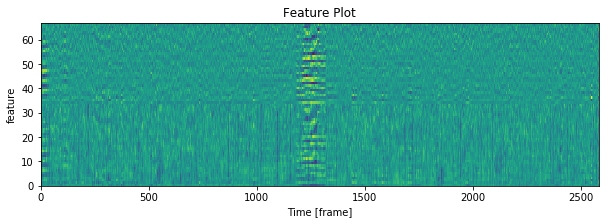

n = 317695 ,k updates! k =  363 New Sxx has length  2582
mixture_devtrain_babycry_363_d6ce7428443f40e354688c35bbf5881f.wav
times: 0 n= 317695 err: -0.06034741792677079
LearningRate: 0.010000000067794123 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 97 ,True Neg= 2406 ,False Pos= 0 ,False Neg= 79
single layer: 
accuracy = 96.9403563129357 %
precision = 98.9795918367347 %
recall = 54.80225988700565 %
F-measure = 70.0896811213753 %


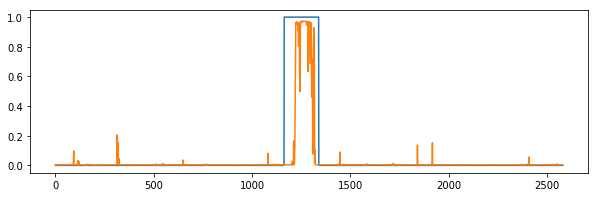

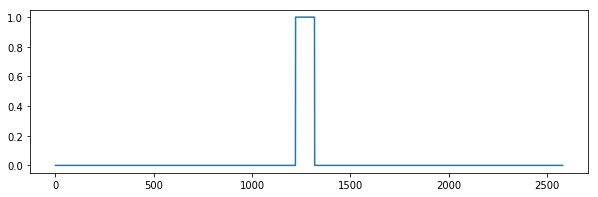

out = out[t-1]+prob* [0.86395039] - [0.72334703]
one time, n= 317720
times: 1 n= 317724 err: -0.0032662293585769843
LearningRate: 0.010000000067794123 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 100 ,True Neg= 2406 ,False Pos= 0 ,False Neg= 76
single layer: 
accuracy = 97.0565453137103 %
precision = 99.00990099009901 %
recall = 56.49717514124294 %
F-measure = 71.48277068648837 %


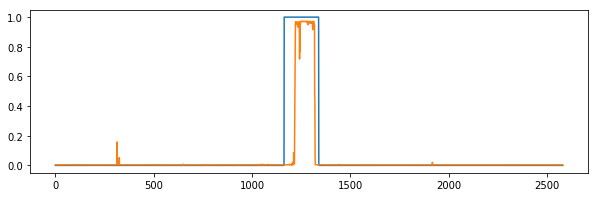

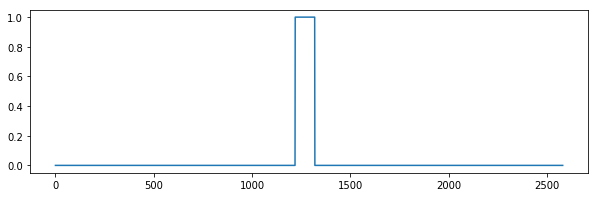

out = out[t-1]+prob* [0.86094139] - [0.72164478]
one time, n= 317745
Sxx.shape= (513, 2582)
(2582, 40)


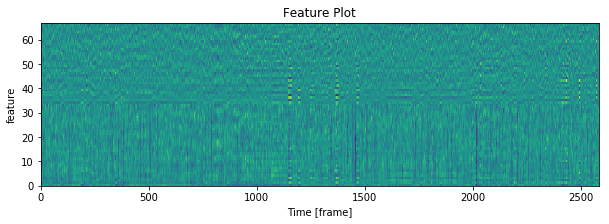

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


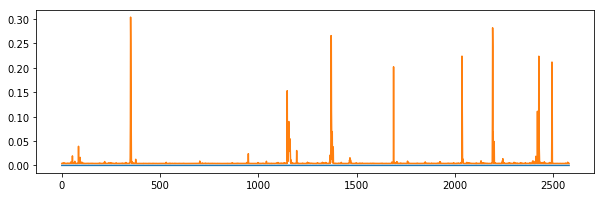

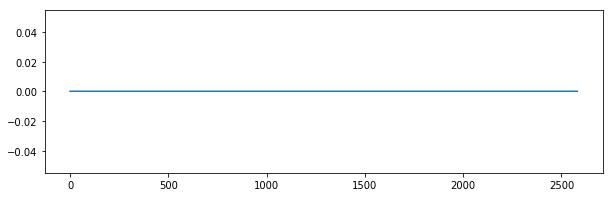

Current:event_tpos = 0 , event_fpos =  0 , event_fneg =  0
Total： event_tpos = 0 , event_fpos =  2 , event_fneg =  0
precision =  0.0 recall =  0.0 f_score =  0.0

###### same class train #######
Sxx.shape= (513, 2582)
t_begin= 2098 t_end= 2187
(1984, 40)


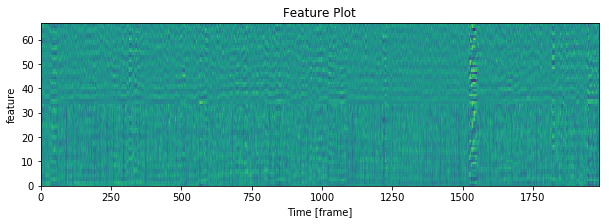

n = 317753 ,k updates! k =  119 New Sxx has length  1984
mixture_devtrain_babycry_119_56d1976748a55313b88674a65bfd8a79.wav
times: 0 n= 317753 err: -0.007448668223204622
LearningRate: 0.010000000067455998 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 28 ,True Neg= 1895 ,False Pos= 0 ,False Neg= 61
single layer: 
accuracy = 96.92540322580645 %
precision = 96.55172413793103 %
recall = 31.11111111111111 %
F-measure = 46.69307048628689 %


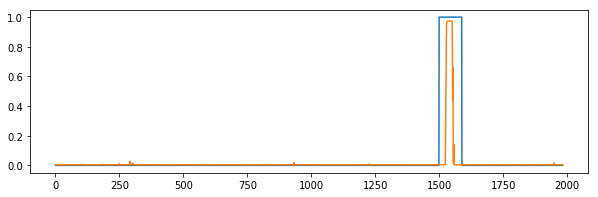

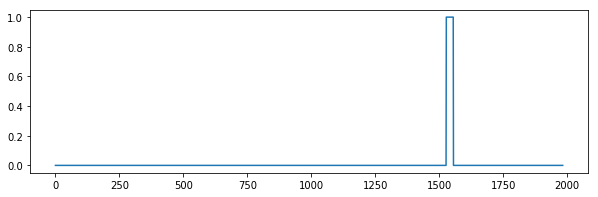

out = out[t-1]+prob* [0.86124028] - [0.71248744]
one time, n= 317772
times: 1 n= 317782 err: -0.006591194104468134
LearningRate: 0.010000000067455998 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 29 ,True Neg= 1895 ,False Pos= 0 ,False Neg= 60
single layer: 
accuracy = 96.9758064516129 %
precision = 96.66666666666667 %
recall = 32.22222222222222 %
F-measure = 47.96122041631024 %


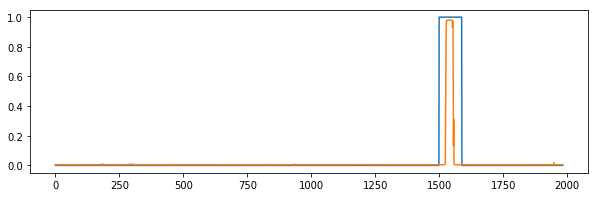

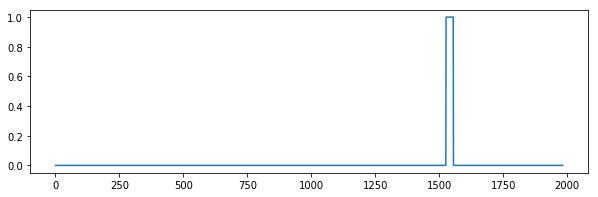

out = out[t-1]+prob* [0.8854252] - [0.68899551]
one time, n= 317791
Sxx.shape= (513, 2582)
t_begin= 1972 t_end= 2166
(2110, 40)


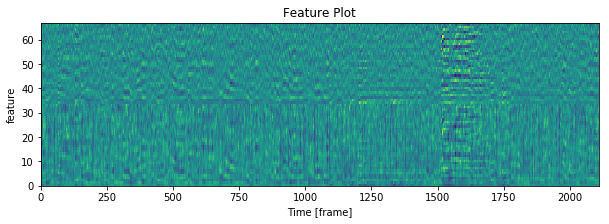

###### Test Set ######
(2110, 67)
(2110,)
True Pos= 77 ,True Neg= 1916 ,False Pos= 0 ,False Neg= 117
single layer: 
accuracy = 94.45497630331754 %
precision = 98.71794871794873 %
recall = 39.48717948717949 %
F-measure = 56.00502524429582 %


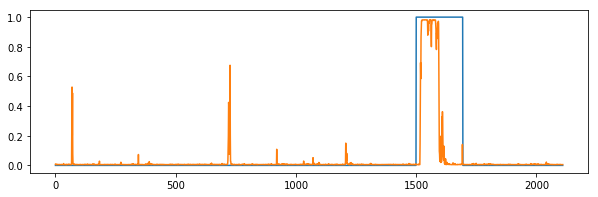

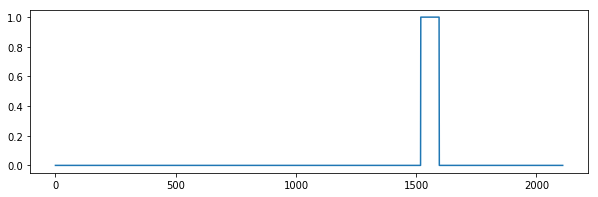

Current:event_tpos = 1 , event_fpos =  0 , event_fneg =  1
Total： event_tpos = 1 , event_fpos =  2 , event_fneg =  1
precision =  0.3225806451612903 recall =  0.47619047619047616 f_score =  0.34182191078448126

###### same class train #######
Sxx.shape= (513, 2582)
t_begin= 1107 t_end= 1280
(2582, 40)


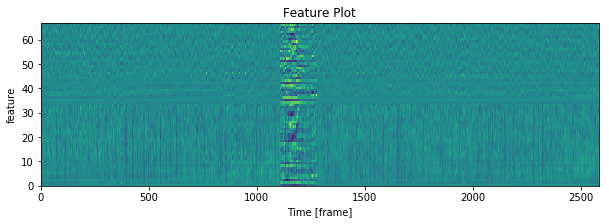

n = 317811 ,k updates! k =  259 New Sxx has length  2582
mixture_devtrain_babycry_259_dabd646fc590f19d62635c6c46a1dc6d.wav
times: 0 n= 317811 err: -0.04933256072915805
LearningRate: 0.010000000067200152 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 157 ,True Neg= 2406 ,False Pos= 3 ,False Neg= 16
single layer: 
accuracy = 99.26413632842758 %
precision = 97.51552795031056 %
recall = 90.22988505747126 %
F-measure = 93.23474131699699 %


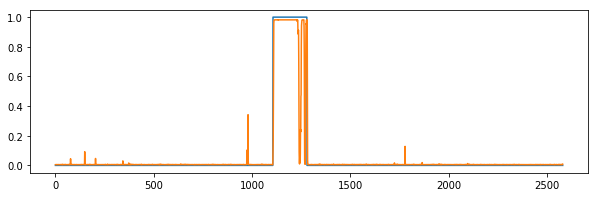

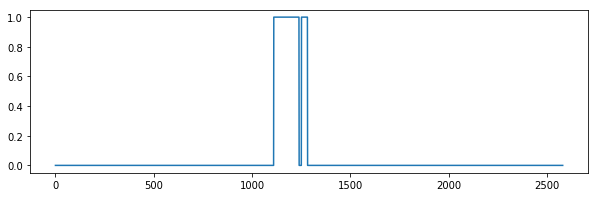

out = out[t-1]+prob* [0.8928582] - [0.6783367]
one time, n= 317836
times: 1 n= 317840 err: -0.004575273291433732
LearningRate: 0.010000000067200152 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 170 ,True Neg= 2406 ,False Pos= 3 ,False Neg= 3
single layer: 
accuracy = 99.76762199845082 %
precision = 97.70114942528735 %
recall = 97.70114942528735 %
F-measure = 97.20369522033623 %


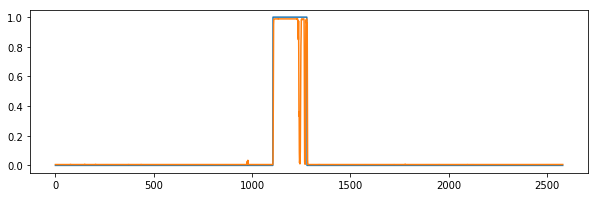

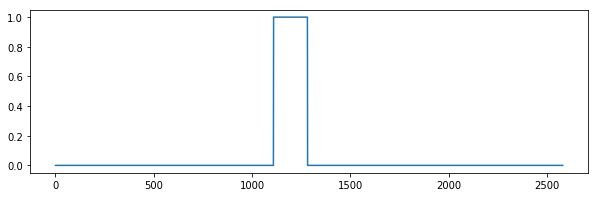

out = out[t-1]+prob* [0.93690326] - [0.64100468]
one time, n= 317861
Sxx.shape= (513, 2582)
(2582, 40)


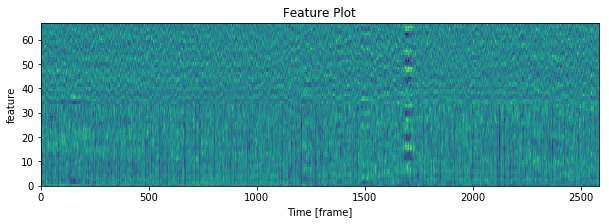

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


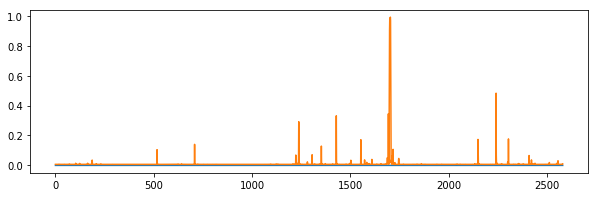

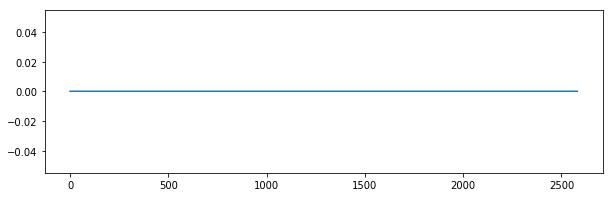

Current:event_tpos = 0 , event_fpos =  0 , event_fneg =  0
Total： event_tpos = 1 , event_fpos =  2 , event_fneg =  1
precision =  0.3225806451612903 recall =  0.47619047619047616 f_score =  0.34182191078448126

###### same class train #######
Sxx.shape= (513, 2582)
(2582, 40)


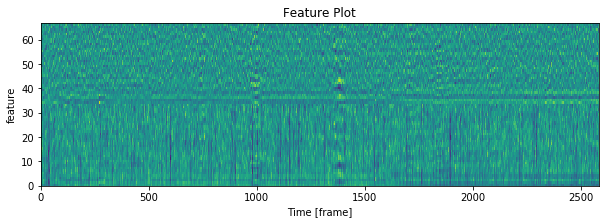

n = 317869 ,k updates! k =  235 New Sxx has length  2582
mixture_devtrain_babycry_235_16e6a34733ca3de18708481f35e10cb7.wav
times: 1 n= 317869 err: -0.013636944874495112
LearningRate: 0.010000000013372997 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


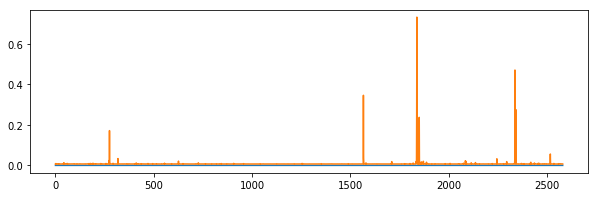

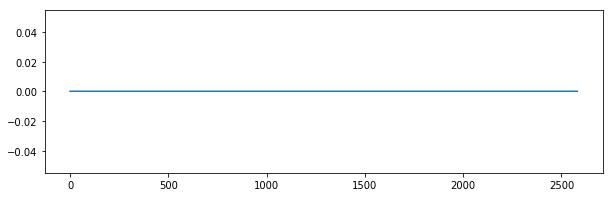

out = out[t-1]+prob* [0.98149636] - [0.60241498]
one time, n= 317878
Sxx.shape= (513, 2582)
t_begin= 781 t_end= 859
(2582, 40)


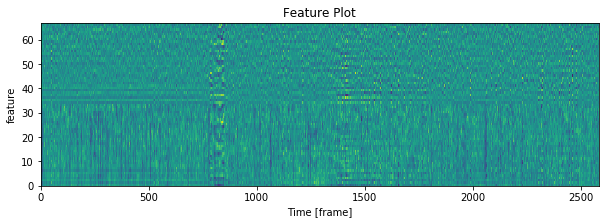

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 2504 ,False Pos= 0 ,False Neg= 78
single layer: 
accuracy = 96.97908597986057 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


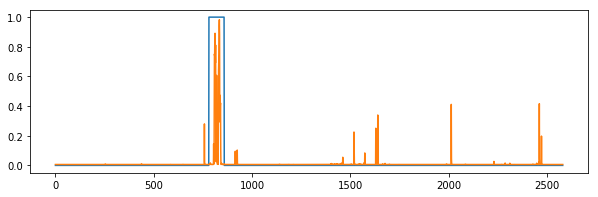

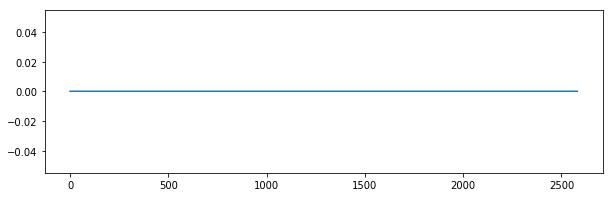

Current:event_tpos = 0 , event_fpos =  0 , event_fneg =  1
Total： event_tpos = 1 , event_fpos =  2 , event_fneg =  2
precision =  0.3225806451612903 recall =  0.3225806451612903 f_score =  0.27929060187124705

###### Same class Train  #######
Sxx.shape= (513, 2582)
(2582, 40)


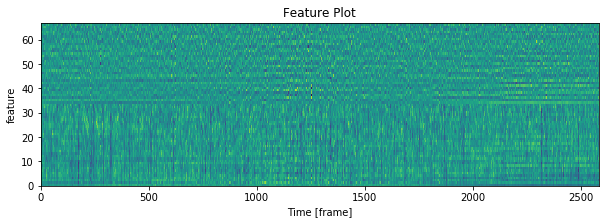

n = 317898 ,k updates! k =  263 New Sxx has length  2582
mixture_devtrain_babycry_263_88185ad312d3a2491ea6b190c79fe73e.wav
times: 0 n= 317898 err: -0.0002504744997695401
LearningRate: 0.010000000066804838 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


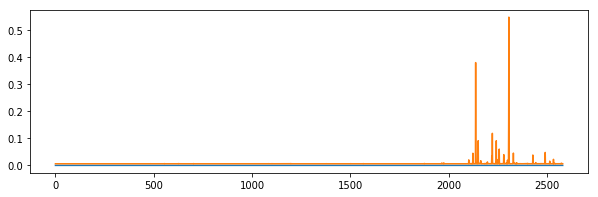

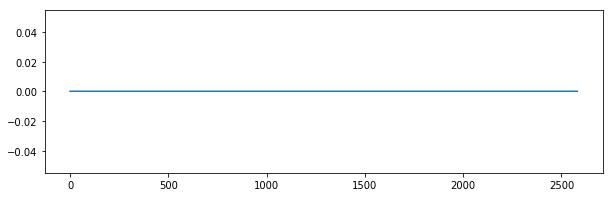

out = out[t-1]+prob* [0.95513018] - [0.62690078]
one time, n= 317923
times: 1 n= 317927 err: -5.9527376994187945e-06
LearningRate: 0.010000000066804838 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


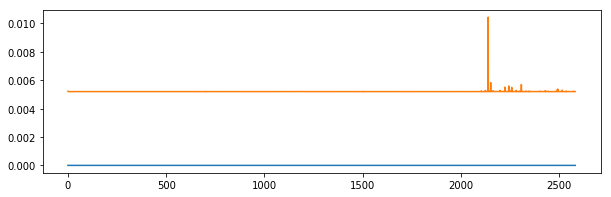

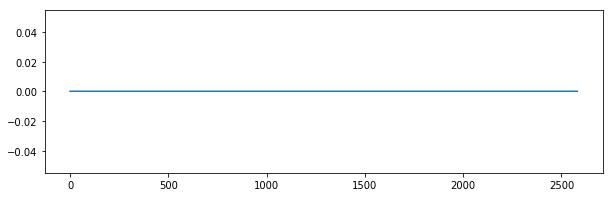

out = out[t-1]+prob* [0.93414995] - [0.65608587]
one time, n= 317948
Sxx.shape= (513, 2582)
(2582, 40)


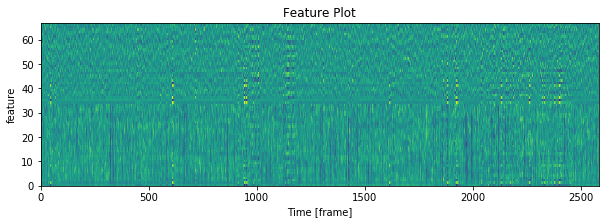

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


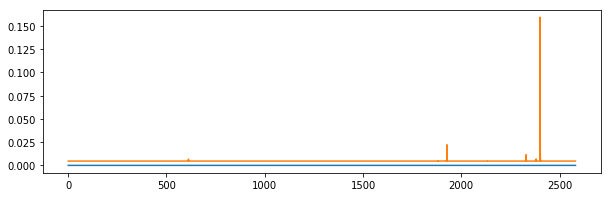

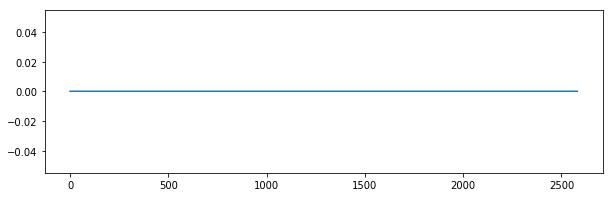

Current:event_tpos = 0 , event_fpos =  0 , event_fneg =  0
Total： event_tpos = 1 , event_fpos =  2 , event_fneg =  2
precision =  0.3225806451612903 recall =  0.3225806451612903 f_score =  0.27929060187124705

###### same class train #######
Sxx.shape= (513, 2582)
t_begin= 1419 t_end= 1616
(2582, 40)


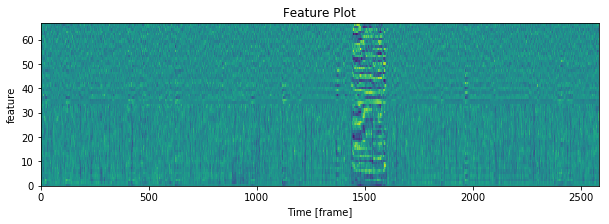

n = 317956 ,k updates! k =  172 New Sxx has length  2582
mixture_devtrain_babycry_172_f4de95ead7497473a645eedb0c6d21a7.wav
times: 0 n= 317956 err: -1.0182148212770225e-06
LearningRate: 0.010000000066471648 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 56 ,True Neg= 2385 ,False Pos= 0 ,False Neg= 141
single layer: 
accuracy = 94.53911696359411 %
precision = 98.24561403508771 %
recall = 28.28282828282828 %
F-measure = 43.57716256532753 %


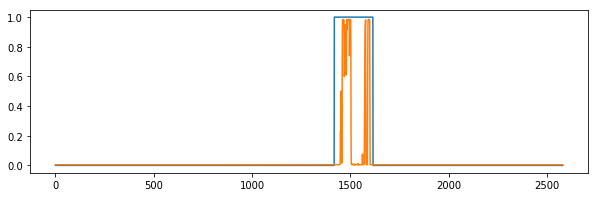

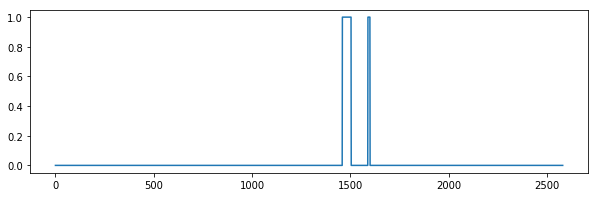

out = out[t-1]+prob* [0.93411078] - [0.67980502]
one time, n= 317981
times: 1 n= 317985 err: -0.005325257412288109
LearningRate: 0.010000000066471648 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 154 ,True Neg= 2385 ,False Pos= 0 ,False Neg= 43
single layer: 
accuracy = 98.33462432223082 %
precision = 99.35483870967742 %
recall = 77.77777777777779 %
F-measure = 86.76230910078674 %


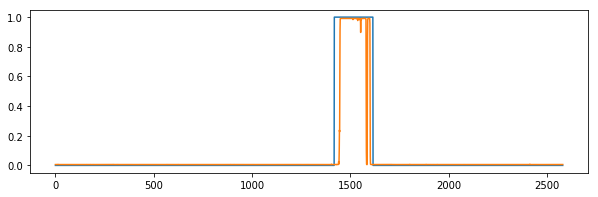

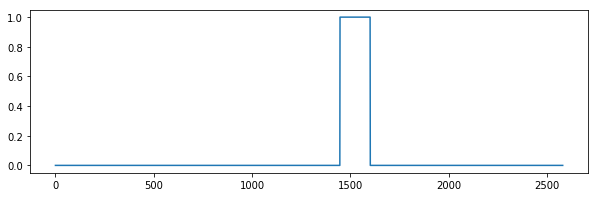

out = out[t-1]+prob* [0.99438443] - [0.64337442]
one time, n= 318006
Sxx.shape= (513, 2582)
t_begin= 1102 t_end= 1347
(2582, 40)


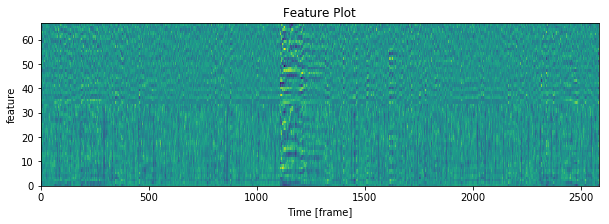

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 58 ,True Neg= 2337 ,False Pos= 0 ,False Neg= 187
single layer: 
accuracy = 92.75755228505035 %
precision = 98.30508474576271 %
recall = 23.577235772357724 %
F-measure = 37.72328111806243 %


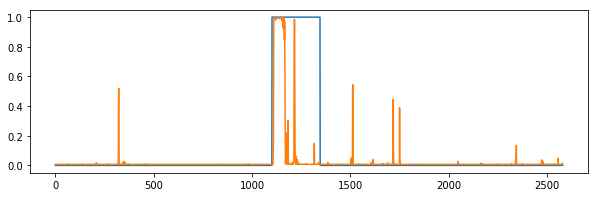

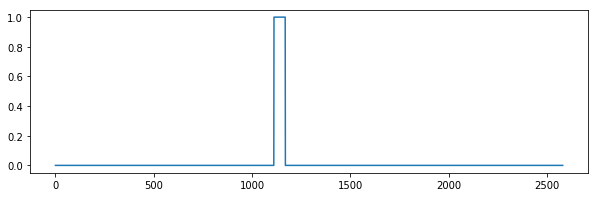

Current:event_tpos = 1 , event_fpos =  0 , event_fneg =  1
Total： event_tpos = 2 , event_fpos =  2 , event_fneg =  3
precision =  0.48780487804878053 recall =  0.3921568627450981 f_score =  0.3904153042799278

###### same class train #######
Sxx.shape= (513, 2582)
t_begin= 2363 t_end= 2490
(1719, 40)


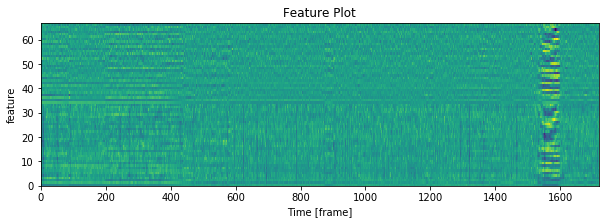

n = 318014 ,k updates! k =  186 New Sxx has length  1719
mixture_devtrain_babycry_186_94f9f0b409f20cf35a506f573d294bb8.wav
times: 0 n= 318014 err: -0.4167925818411151
LearningRate: 0.01000000006614012 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 58 ,True Neg= 1592 ,False Pos= 0 ,False Neg= 69
single layer: 
accuracy = 95.98603839441536 %
precision = 98.30508474576271 %
recall = 45.3125 %
F-measure = 61.60314681472908 %


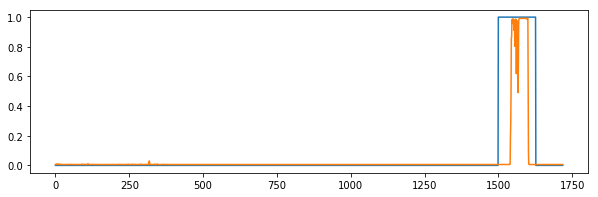

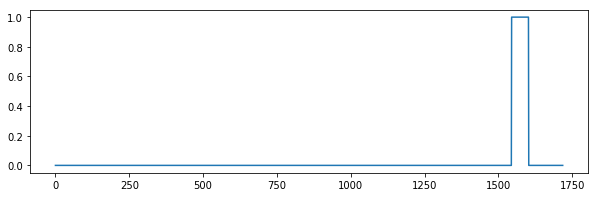

out = out[t-1]+prob* [0.99688282] - [0.63437545]
one time, n= 318031
times: 1 n= 318043 err: -0.0059610011240521345
LearningRate: 0.01000000006614012 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 62 ,True Neg= 1592 ,False Pos= 0 ,False Neg= 65
single layer: 
accuracy = 96.21873182082606 %
precision = 98.4126984126984 %
recall = 48.4375 %
F-measure = 64.4823629665913 %


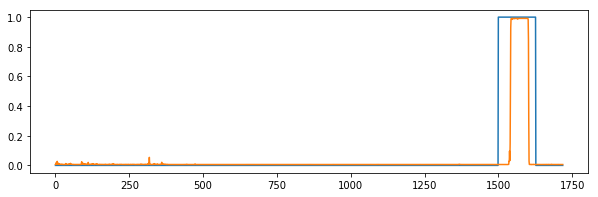

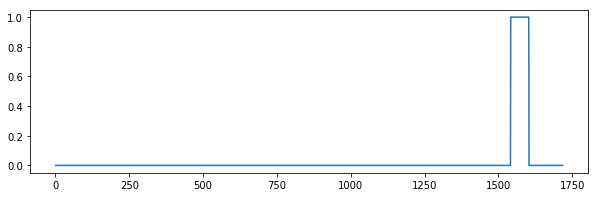

out = out[t-1]+prob* [0.99340268] - [0.63411896]
one time, n= 318048
Sxx.shape= (513, 2582)
(2582, 40)


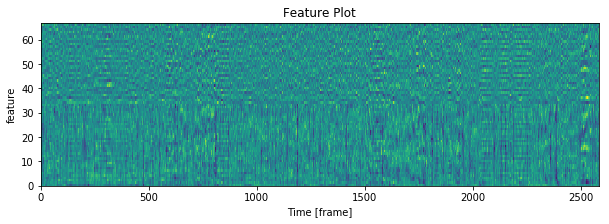

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 1916 ,False Pos= 666 ,False Neg= 0
single layer: 
accuracy = 74.20604182804028 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


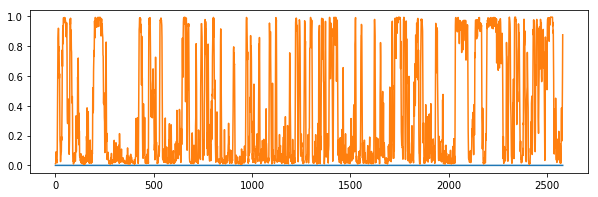

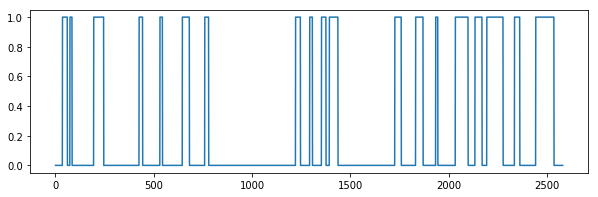

Current:event_tpos = 0 , event_fpos =  19 , event_fneg =  0
Total： event_tpos = 2 , event_fpos =  21 , event_fneg =  3
precision =  0.08658008658008658 recall =  0.3921568627450981 f_score =  0.11733474135022953

###### same class train #######
Sxx.shape= (513, 2582)
(2582, 40)


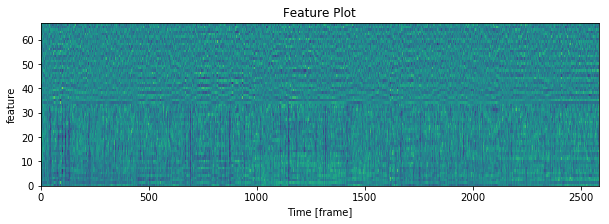

n = 318072 ,k updates! k =  5 New Sxx has length  2582
mixture_devtrain_babycry_005_02c94942f42f96cdc50ed1a87200ba5b.wav
times: 1 n= 318072 err: -0.5162866859071609
LearningRate: 0.010000000013183125 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


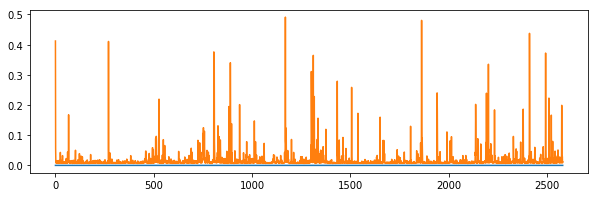

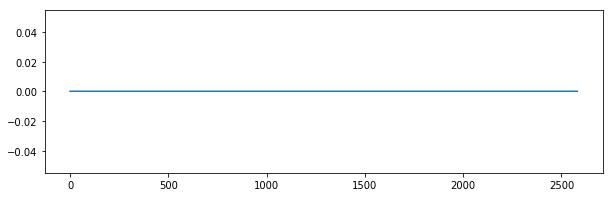

out = out[t-1]+prob* [0.98633132] - [0.63369696]
one time, n= 318081
Sxx.shape= (513, 2582)
(2582, 40)


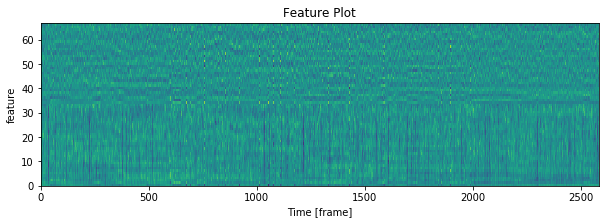

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


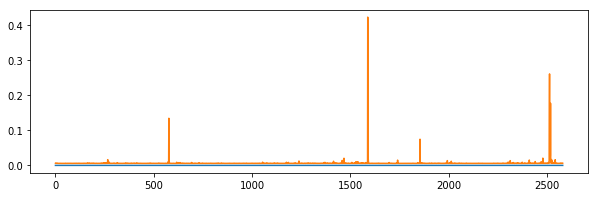

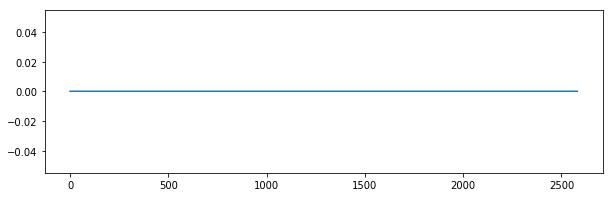

Current:event_tpos = 0 , event_fpos =  0 , event_fneg =  0
Total： event_tpos = 2 , event_fpos =  21 , event_fneg =  3
precision =  0.08658008658008658 recall =  0.3921568627450981 f_score =  0.11733474135022953

###### same class train #######
Sxx.shape= (513, 2582)
(2582, 40)


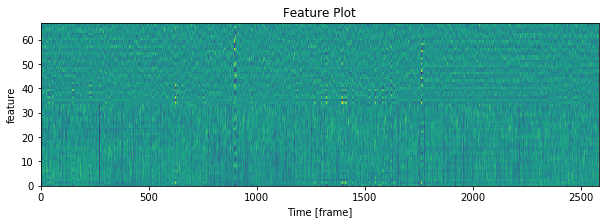

n = 318101 ,k updates! k =  76 New Sxx has length  2582
mixture_devtrain_babycry_076_ceb67023cf6c69b59148c35196a9c2a0.wav
times: 1 n= 318101 err: -0.10311437984131876
LearningRate: 0.010000000013171266 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


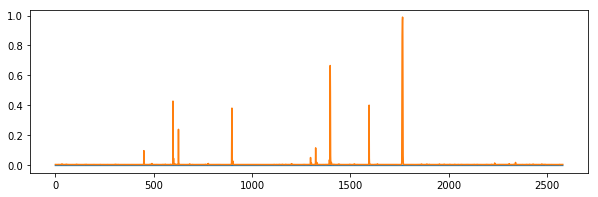

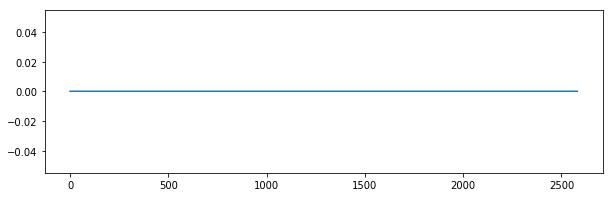

out = out[t-1]+prob* [0.97746833] - [0.64047572]
one time, n= 318110
Sxx.shape= (513, 2582)
t_begin= 376 t_end= 513
(2582, 40)


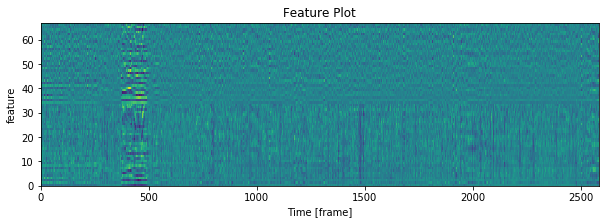

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 123 ,True Neg= 2445 ,False Pos= 0 ,False Neg= 14
single layer: 
accuracy = 99.4577846630519 %
precision = 99.19354838709677 %
recall = 89.13043478260869 %
F-measure = 93.3971908614099 %


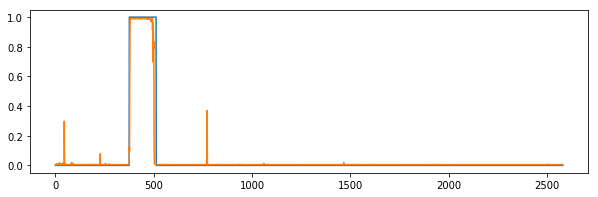

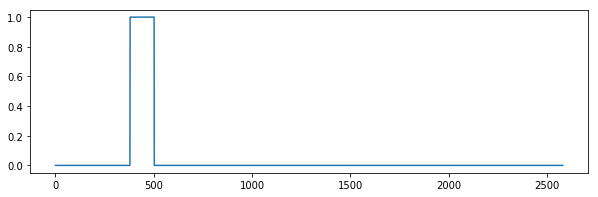

Current:event_tpos = 1 , event_fpos =  0 , event_fneg =  0
Total： event_tpos = 3 , event_fpos =  21 , event_fneg =  3
precision =  0.12448132780082986 recall =  0.49180327868852464 f_score =  0.17093854759214064

###### same class train #######
Sxx.shape= (513, 2582)
(2582, 40)


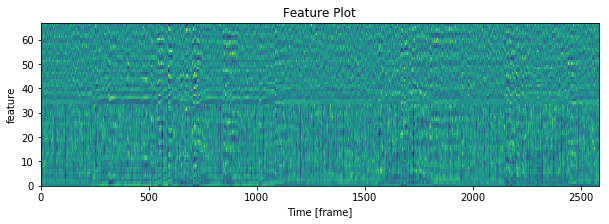

n = 318130 ,k updates! k =  492 New Sxx has length  2582
mixture_devtrain_babycry_492_6a37a19183f5ab3e45c1751274659e6f.wav
times: 1 n= 318130 err: -0.007567555705457169
LearningRate: 0.010000000013159416 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


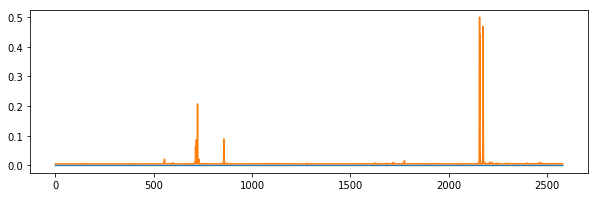

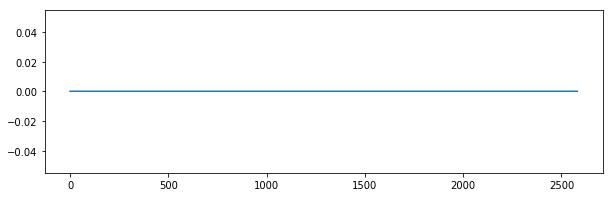

out = out[t-1]+prob* [0.96955742] - [0.64730638]
one time, n= 318139
Sxx.shape= (513, 2582)
(2582, 40)


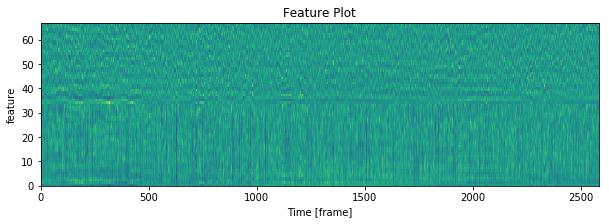

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


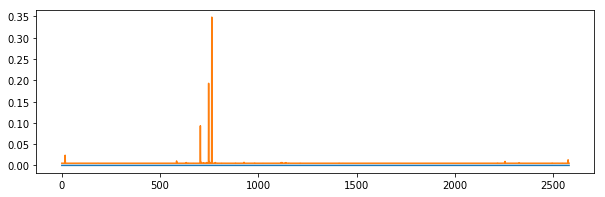

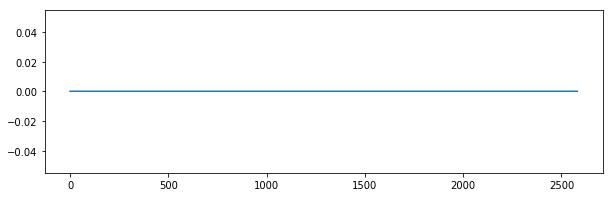

Current:event_tpos = 0 , event_fpos =  0 , event_fneg =  0
Total： event_tpos = 3 , event_fpos =  21 , event_fneg =  3
precision =  0.12448132780082986 recall =  0.49180327868852464 f_score =  0.17093854759214064

###### same class train #######
Sxx.shape= (513, 2582)
(2582, 40)


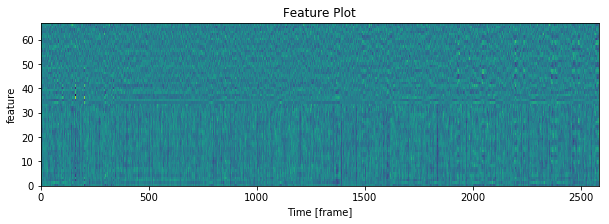

n = 318159 ,k updates! k =  129 New Sxx has length  2582
mixture_devtrain_babycry_129_1b5a4845fd50cfa336da06328553d61f.wav
times: 1 n= 318159 err: -0.0011052936124092327
LearningRate: 0.010000000013147579 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


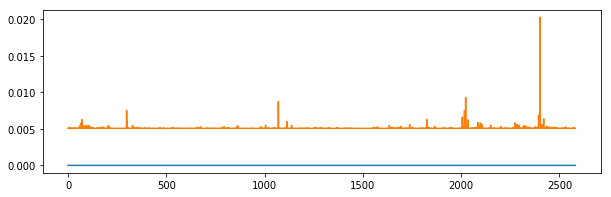

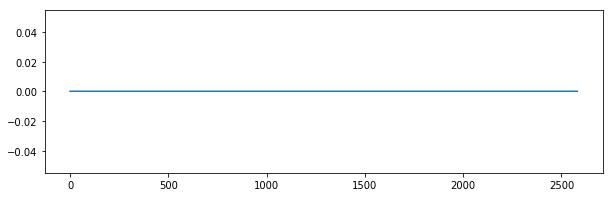

out = out[t-1]+prob* [0.95209475] - [0.66127284]
one time, n= 318168
Sxx.shape= (513, 2582)
t_begin= 251 t_end= 378
(2582, 40)


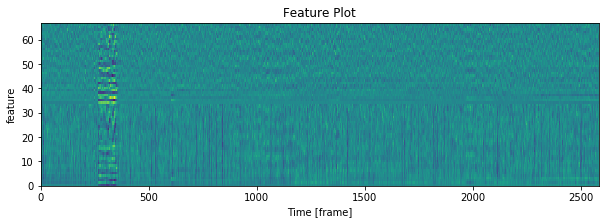

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 78 ,True Neg= 2455 ,False Pos= 0 ,False Neg= 49
single layer: 
accuracy = 98.10224632068164 %
precision = 98.73417721518987 %
recall = 60.9375 %
F-measure = 74.89327339245357 %


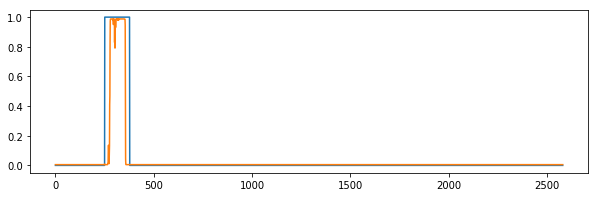

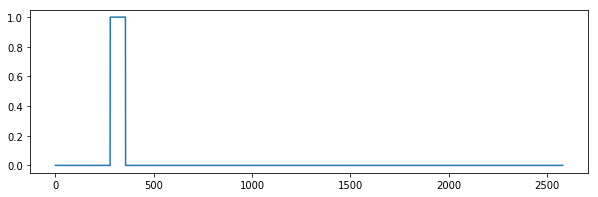

Current:event_tpos = 1 , event_fpos =  0 , event_fneg =  1
Total： event_tpos = 4 , event_fpos =  21 , event_fneg =  4
precision =  0.1593625498007968 recall =  0.4938271604938272 f_score =  0.2089714035694928

###### same class train #######
Sxx.shape= (513, 2582)
t_begin= 1316 t_end= 1454
(2582, 40)


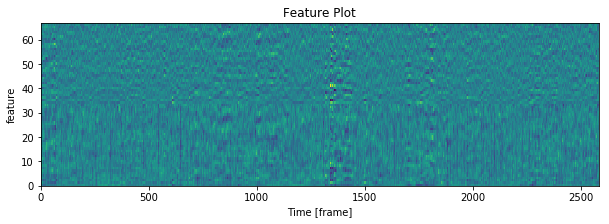

n = 318188 ,k updates! k =  499 New Sxx has length  2582
mixture_devtrain_babycry_499_144fa9d0f3aee743454992e60e077590.wav
times: 0 n= 318188 err: -0.003915762905615369
LearningRate: 0.010000000065678754 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 14 ,True Neg= 2444 ,False Pos= 0 ,False Neg= 124
single layer: 
accuracy = 95.19752130131681 %
precision = 93.33333333333333 %
recall = 10.071942446043165 %
F-measure = 18.007671635620277 %


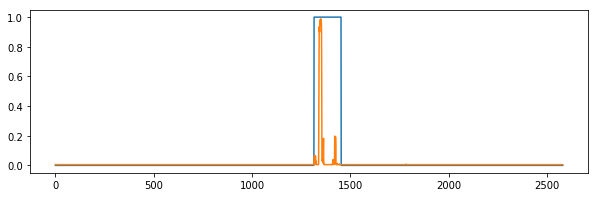

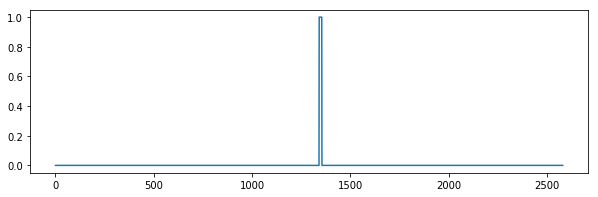

out = out[t-1]+prob* [0.95206881] - [0.66239295]
one time, n= 318213
times: 1 n= 318217 err: -0.011752074891846724
LearningRate: 0.010000000065678754 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 66 ,True Neg= 2444 ,False Pos= 0 ,False Neg= 72
single layer: 
accuracy = 97.21146398140976 %
precision = 98.50746268656717 %
recall = 47.482014388489205 %
F-measure = 63.64173618045851 %


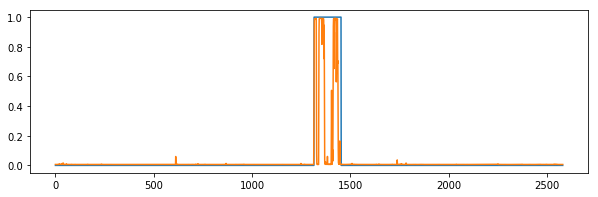

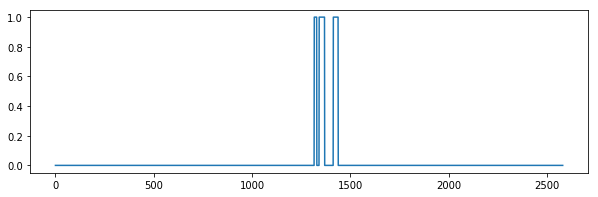

out = out[t-1]+prob* [0.99062489] - [0.62373232]
one time, n= 318238
Sxx.shape= (513, 2582)
t_begin= 76 t_end= 234
(2582, 40)


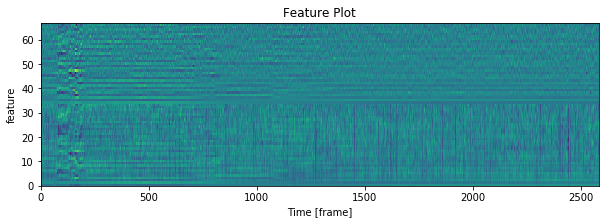

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 107 ,True Neg= 2335 ,False Pos= 89 ,False Neg= 51
single layer: 
accuracy = 94.57784663051898 %
precision = 54.314720812182735 %
recall = 67.29559748427673 %
F-measure = 59.622087929170064 %


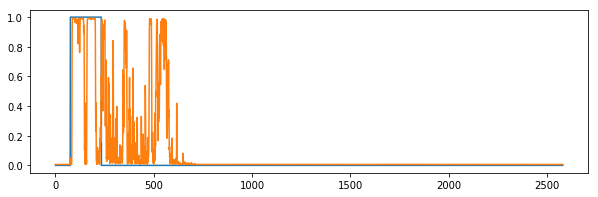

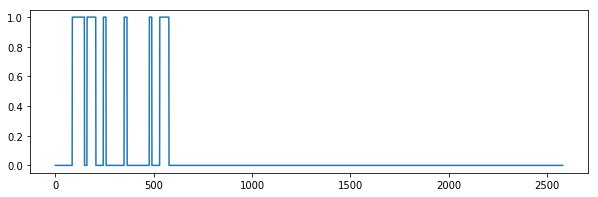

Current:event_tpos = 1 , event_fpos =  4 , event_fneg =  1
Total： event_tpos = 5 , event_fpos =  25 , event_fneg =  5
precision =  0.16611295681063123 recall =  0.49504950495049505 f_score =  0.21607512499945983

###### same class train #######
Sxx.shape= (513, 2582)
t_begin= 1148 t_end= 1490
(2582, 40)


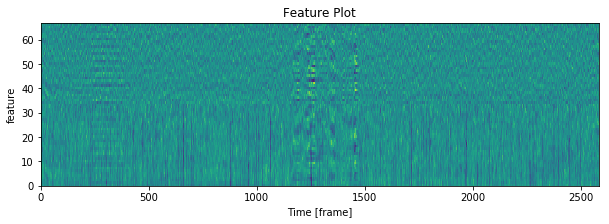

n = 318246 ,k updates! k =  264 New Sxx has length  2582
mixture_devtrain_babycry_264_ade1c66ad75300f8d25fb5fd34e480b7.wav
times: 0 n= 318246 err: -0.013968573112652774
LearningRate: 0.010000000065351181 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 93 ,True Neg= 2240 ,False Pos= 0 ,False Neg= 249
single layer: 
accuracy = 90.35631293570874 %
precision = 98.93617021276596 %
recall = 27.113702623906704 %
F-measure = 42.22791944617906 %


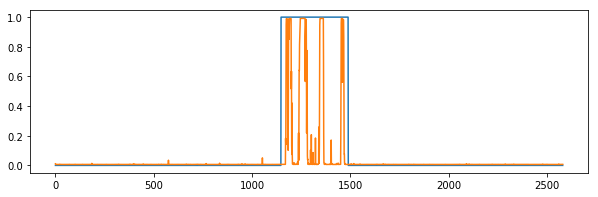

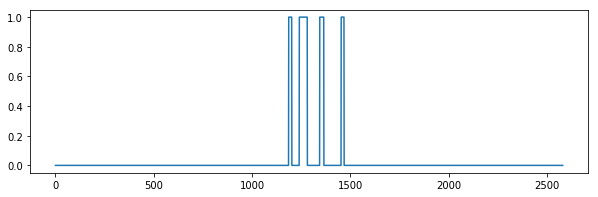

out = out[t-1]+prob* [0.98257124] - [0.61936949]
one time, n= 318271
times: 1 n= 318275 err: -0.017073189055766342
LearningRate: 0.010000000065351181 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 117 ,True Neg= 2240 ,False Pos= 0 ,False Neg= 225
single layer: 
accuracy = 91.2858249419055 %
precision = 99.15254237288136 %
recall = 34.11078717201166 %
F-measure = 50.38116188403243 %


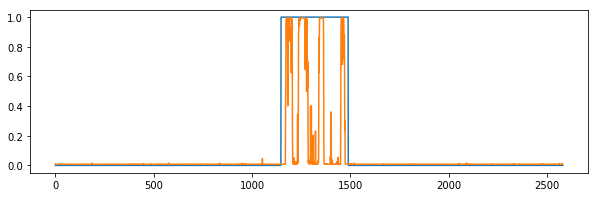

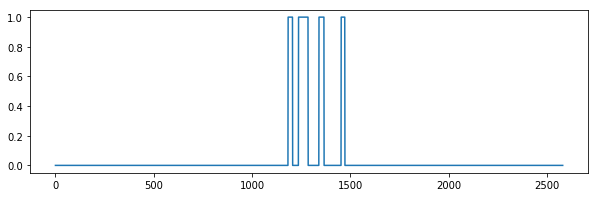

out = out[t-1]+prob* [1.01910149] - [0.5805637]
one time, n= 318296
Sxx.shape= (513, 2582)
t_begin= 1785 t_end= 1973
(2297, 40)


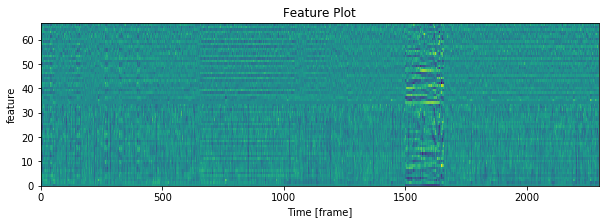

###### Test Set ######
(2297, 67)
(2297,)
True Pos= 162 ,True Neg= 2109 ,False Pos= 0 ,False Neg= 26
single layer: 
accuracy = 98.86808881149325 %
precision = 99.38650306748467 %
recall = 85.71428571428571 %
F-measure = 91.55085452173626 %


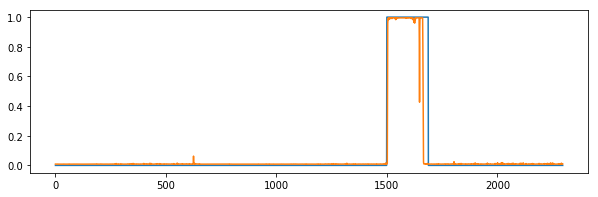

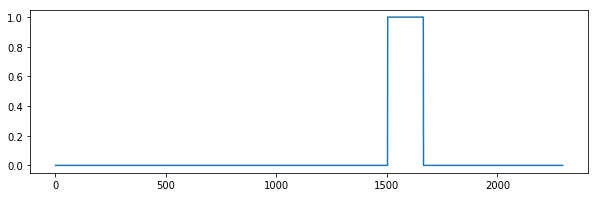

Current:event_tpos = 1 , event_fpos =  0 , event_fneg =  0
Total： event_tpos = 6 , event_fpos =  25 , event_fneg =  5
precision =  0.19292604501607716 recall =  0.5405405405405406 f_score =  0.25024242234664834

###### same class train #######
Sxx.shape= (513, 2582)
(2582, 40)


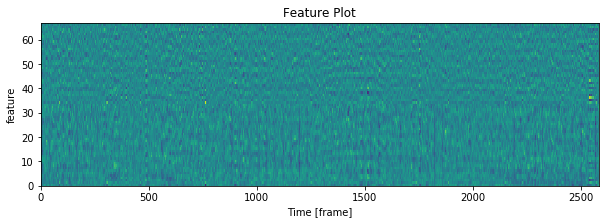

n = 318304 ,k updates! k =  250 New Sxx has length  2582
mixture_devtrain_babycry_250_5567bbc45c0ac7ebad6d76b5b827e8b2.wav
times: 1 n= 318304 err: -0.05631992086783674
LearningRate: 0.010000000013005049 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


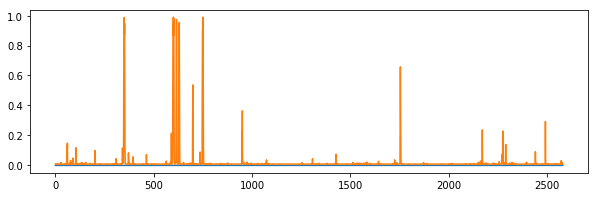

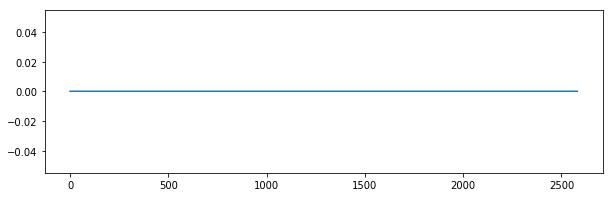

out = out[t-1]+prob* [1.02563155] - [0.56694773]
one time, n= 318313
Sxx.shape= (513, 2582)
(2582, 40)


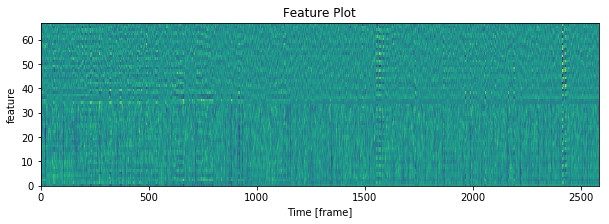

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 2549 ,False Pos= 33 ,False Neg= 0
single layer: 
accuracy = 98.72192099147948 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


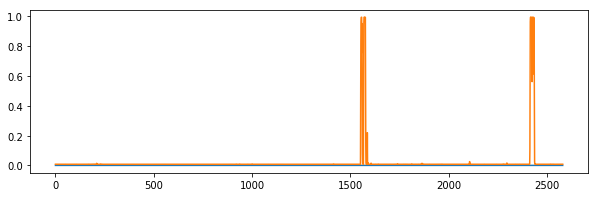

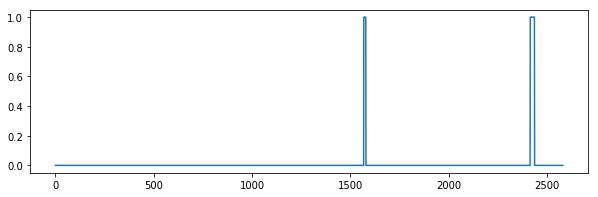

Current:event_tpos = 0 , event_fpos =  2 , event_fneg =  0
Total： event_tpos = 6 , event_fpos =  27 , event_fneg =  5
precision =  0.18126888217522658 recall =  0.5405405405405406 f_score =  0.2384571820322513

###### same class train #######
Sxx.shape= (513, 2582)
t_begin= 259 t_end= 418
(2582, 40)


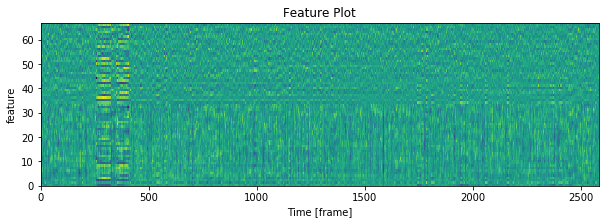

n = 318333 ,k updates! k =  128 New Sxx has length  2582
mixture_devtrain_babycry_128_d1d54aaed21d8b75546c8b7febeb5736.wav
times: 0 n= 318333 err: -0.007725983516738466
LearningRate: 0.010000000064966744 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 144 ,True Neg= 2422 ,False Pos= 1 ,False Neg= 15
single layer: 
accuracy = 99.38032532920217 %
precision = 98.63013698630137 %
recall = 90.0 %
F-measure = 93.62132485732863 %


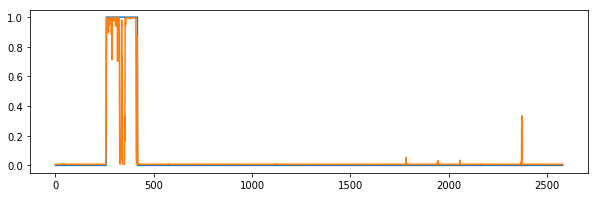

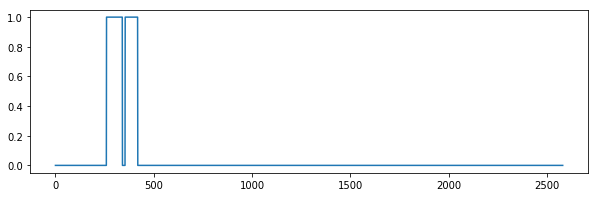

out = out[t-1]+prob* [1.01010865] - [0.58412921]
one time, n= 318358
times: 1 n= 318362 err: -0.1489929425611867
LearningRate: 0.010000000064966744 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 159 ,True Neg= 2421 ,False Pos= 2 ,False Neg= 0
single layer: 
accuracy = 99.92254066615027 %
precision = 98.14814814814815 %
recall = 99.375 %
F-measure = 98.26030176535062 %


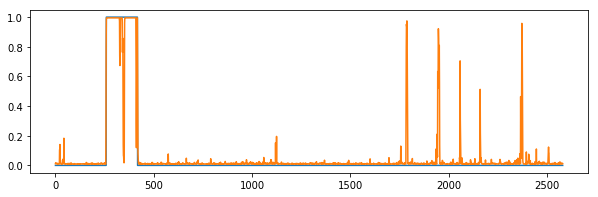

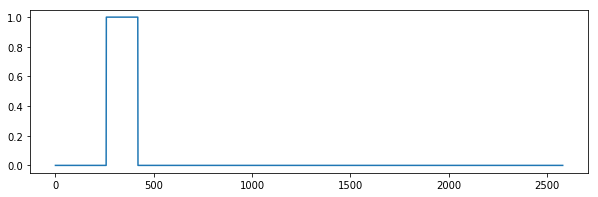

out = out[t-1]+prob* [1.02199886] - [0.56070912]
one time, n= 318383
Sxx.shape= (513, 2582)
(2582, 40)


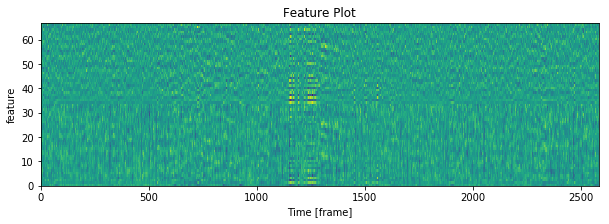

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 2556 ,False Pos= 26 ,False Neg= 0
single layer: 
accuracy = 98.99302865995352 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


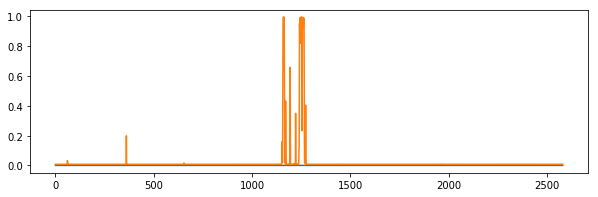

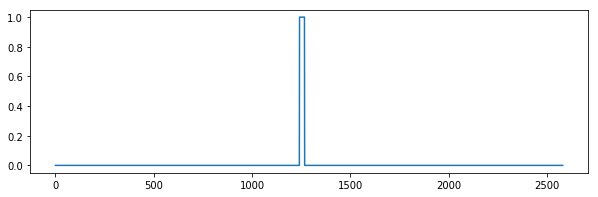

Current:event_tpos = 0 , event_fpos =  1 , event_fneg =  0
Total： event_tpos = 6 , event_fpos =  28 , event_fneg =  5
precision =  0.1759530791788856 recall =  0.5405405405405406 f_score =  0.2329712571711465

###### Same class Train  #######
Sxx.shape= (513, 2582)
t_begin= 975 t_end= 1246
(2582, 40)


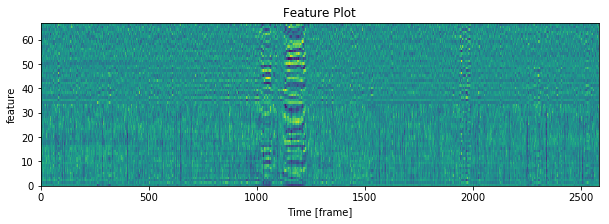

n = 318391 ,k updates! k =  72 New Sxx has length  2582
mixture_devtrain_babycry_072_832b0ef67d062a70b0a9faf7c2288ea2.wav
times: 0 n= 318391 err: -0.0005713590663339333
LearningRate: 0.010000000064642722 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 152 ,True Neg= 2311 ,False Pos= 0 ,False Neg= 119
single layer: 
accuracy = 95.39116963594113 %
precision = 99.34640522875817 %
recall = 55.88235294117647 %
F-measure = 71.07156128568651 %


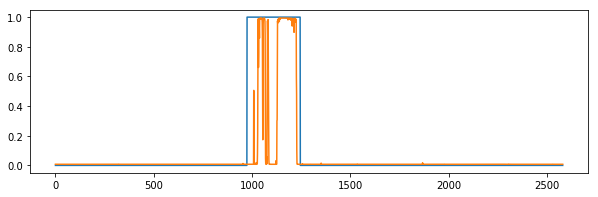

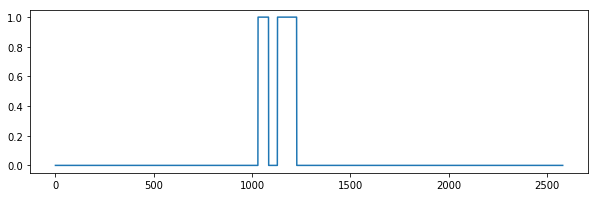

out = out[t-1]+prob* [0.99387924] - [0.5852037]
one time, n= 318416
times: 1 n= 318420 err: -0.010415167425966288
LearningRate: 0.010000000064642722 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 162 ,True Neg= 2311 ,False Pos= 0 ,False Neg= 109
single layer: 
accuracy = 95.77846630518978 %
precision = 99.38650306748467 %
recall = 59.55882352941176 %
F-measure = 74.017082253612 %


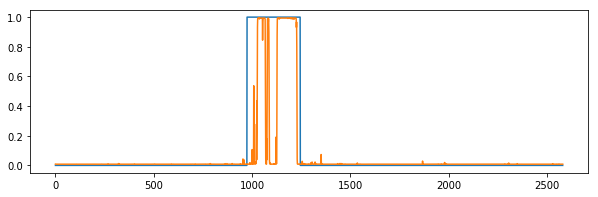

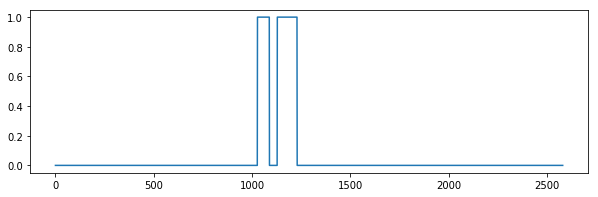

out = out[t-1]+prob* [0.98867802] - [0.57190941]
one time, n= 318441
Sxx.shape= (513, 2582)
(2582, 40)


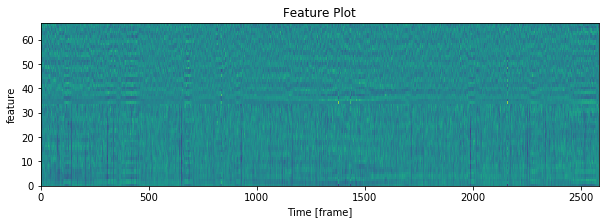

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


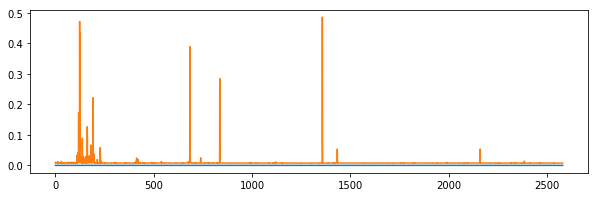

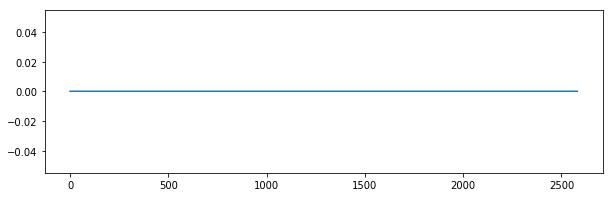

Current:event_tpos = 0 , event_fpos =  0 , event_fneg =  0
Total： event_tpos = 6 , event_fpos =  28 , event_fneg =  5
precision =  0.1759530791788856 recall =  0.5405405405405406 f_score =  0.2329712571711465

###### same class train #######
Sxx.shape= (513, 2582)
t_begin= 1960 t_end= 2104
(2122, 40)


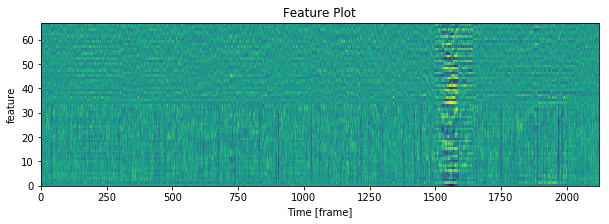

n = 318449 ,k updates! k =  474 New Sxx has length  2122
mixture_devtrain_babycry_474_ae26bad542e389c488a4d8522c070512.wav
times: 0 n= 318449 err: -0.0041867037394752475
LearningRate: 0.010000000064320315 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 66 ,True Neg= 1978 ,False Pos= 0 ,False Neg= 78
single layer: 
accuracy = 96.32422243166823 %
precision = 98.50746268656717 %
recall = 45.51724137931035 %
F-measure = 61.83481615285521 %


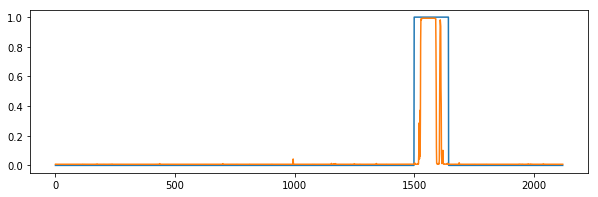

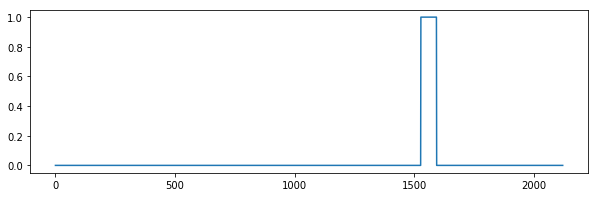

out = out[t-1]+prob* [0.9685858] - [0.5840005]
one time, n= 318470
times: 1 n= 318478 err: -0.0025080921795822457
LearningRate: 0.010000000064320315 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 92 ,True Neg= 1978 ,False Pos= 0 ,False Neg= 52
single layer: 
accuracy = 97.54948162111215 %
precision = 98.9247311827957 %
recall = 63.44827586206897 %
F-measure = 76.83770712432795 %


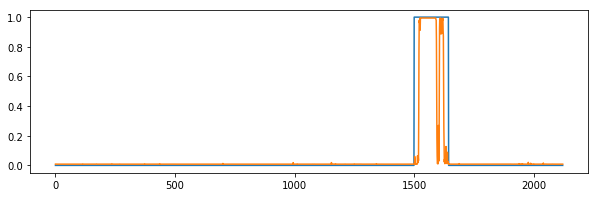

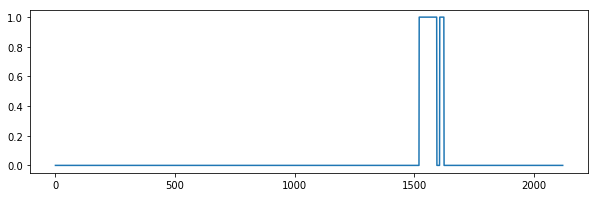

out = out[t-1]+prob* [0.99198039] - [0.56542343]
one time, n= 318491
Sxx.shape= (513, 2582)
(2582, 40)


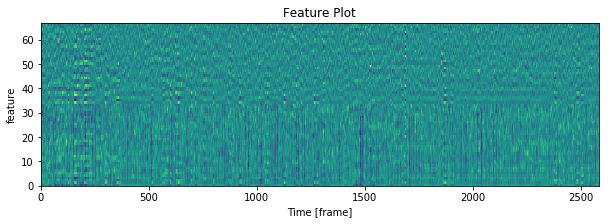

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 2565 ,False Pos= 17 ,False Neg= 0
single layer: 
accuracy = 99.3415956622773 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


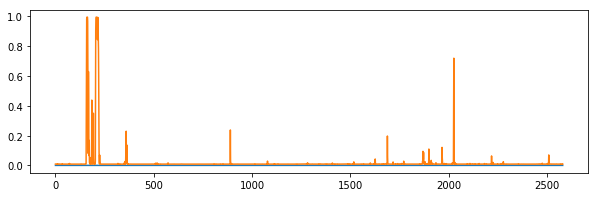

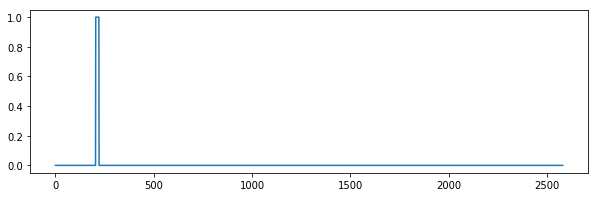

Current:event_tpos = 0 , event_fpos =  1 , event_fneg =  0
Total： event_tpos = 6 , event_fpos =  29 , event_fneg =  5
precision =  0.17094017094017094 recall =  0.5405405405405406 f_score =  0.22773207321586153

###### same class train #######
Sxx.shape= (513, 2582)
(2582, 40)


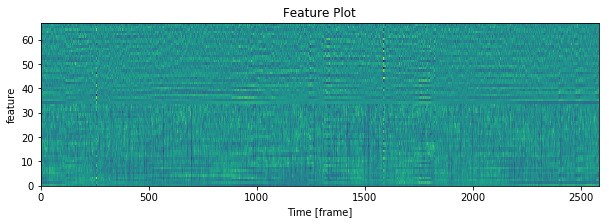

n = 318507 ,k updates! k =  202 New Sxx has length  2582
mixture_devtrain_babycry_202_ce6b8b6ef2330d85d13279e04829560f.wav
times: 1 n= 318507 err: -0.04690918700978317
LearningRate: 0.010000000012810147 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


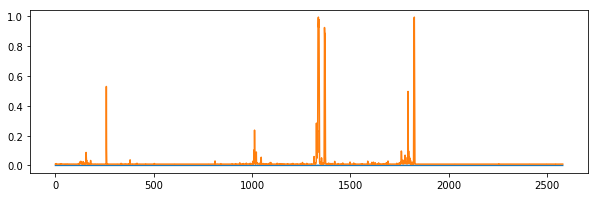

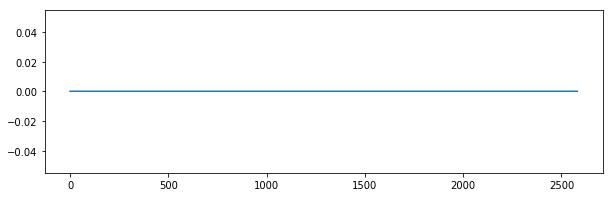

out = out[t-1]+prob* [0.99585895] - [0.56251361]
one time, n= 318516
Sxx.shape= (513, 2582)
(2582, 40)


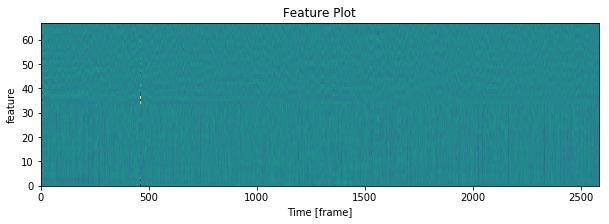

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


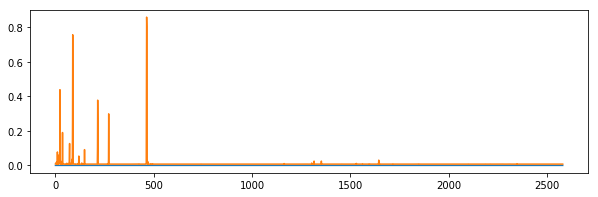

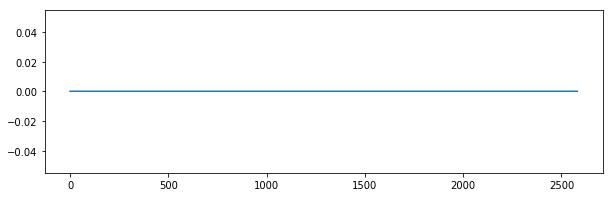

Current:event_tpos = 0 , event_fpos =  0 , event_fneg =  0
Total： event_tpos = 6 , event_fpos =  29 , event_fneg =  5
precision =  0.17094017094017094 recall =  0.5405405405405406 f_score =  0.22773207321586153

###### same class train #######
Sxx.shape= (513, 2582)
t_begin= 1198 t_end= 1371
(2582, 40)


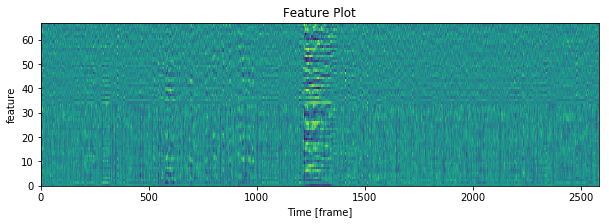

n = 318536 ,k updates! k =  288 New Sxx has length  2582
mixture_devtrain_babycry_288_e6e0f7f88ef0d4bce8ec65a15075c240.wav
times: 0 n= 318536 err: -0.0009390322107585274
LearningRate: 0.010000000063993117 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 86 ,True Neg= 2409 ,False Pos= 0 ,False Neg= 87
single layer: 
accuracy = 96.6305189775368 %
precision = 98.85057471264368 %
recall = 49.42528735632184 %
F-measure = 65.45891603362868 %


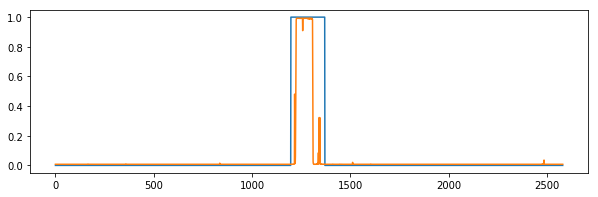

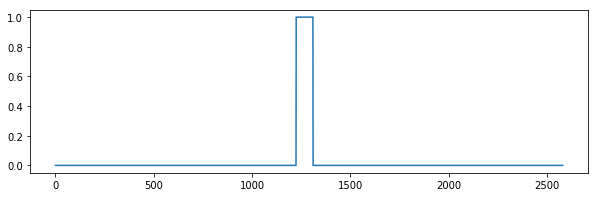

out = out[t-1]+prob* [0.96690808] - [0.58658649]
one time, n= 318561
times: 1 n= 318565 err: -0.0005086696096632409
LearningRate: 0.010000000063993117 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 107 ,True Neg= 2409 ,False Pos= 0 ,False Neg= 66
single layer: 
accuracy = 97.44384198295894 %
precision = 99.07407407407408 %
recall = 61.49425287356321 %
F-measure = 75.41683793383291 %


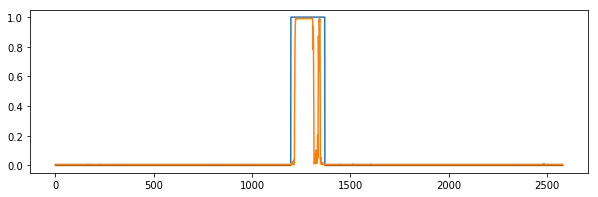

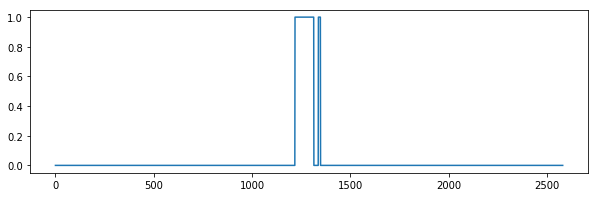

out = out[t-1]+prob* [0.95370868] - [0.60437863]
one time, n= 318586
Sxx.shape= (513, 2582)
t_begin= 1974 t_end= 2148
(2108, 40)


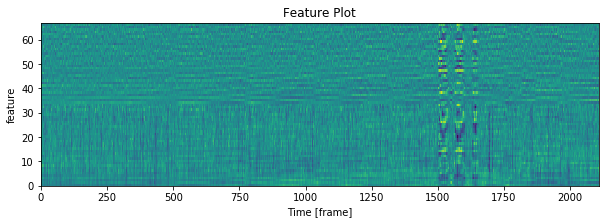

###### Test Set ######
(2108, 67)
(2108,)
True Pos= 88 ,True Neg= 1934 ,False Pos= 0 ,False Neg= 86
single layer: 
accuracy = 95.9203036053131 %
precision = 98.87640449438202 %
recall = 50.28571428571429 %
F-measure = 66.22270205556327 %


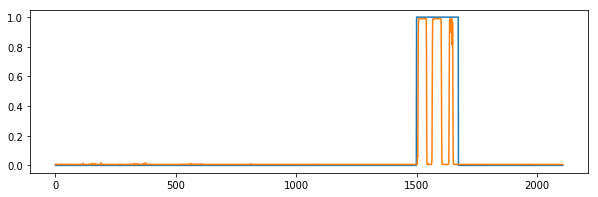

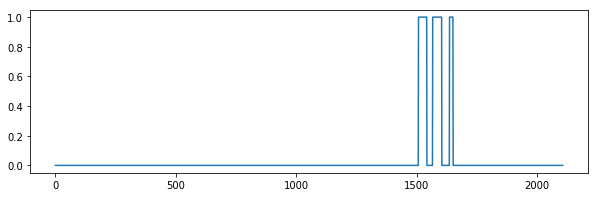

Current:event_tpos = 1 , event_fpos =  0 , event_fneg =  0
Total： event_tpos = 7 , event_fpos =  29 , event_fneg =  5
precision =  0.19390581717451522 recall =  0.578512396694215 f_score =  0.2571631752829451

###### same class train #######
Sxx.shape= (513, 2582)
t_begin= 1419 t_end= 1616
(2582, 40)


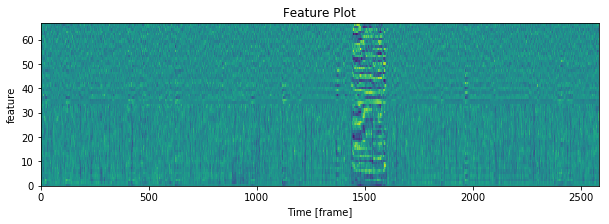

n = 318594 ,k updates! k =  172 New Sxx has length  2582
mixture_devtrain_babycry_172_f4de95ead7497473a645eedb0c6d21a7.wav
times: 0 n= 318594 err: -0.0014671541055230172
LearningRate: 0.010000000063673948 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 155 ,True Neg= 2385 ,False Pos= 0 ,False Neg= 42
single layer: 
accuracy = 98.3733539891557 %
precision = 99.35897435897436 %
recall = 78.28282828282829 %
F-measure = 87.0804191748727 %


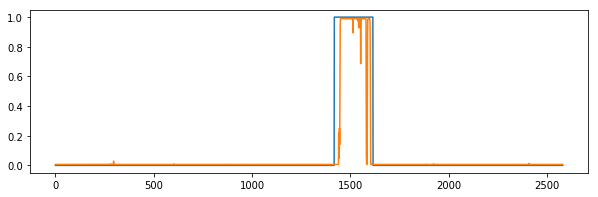

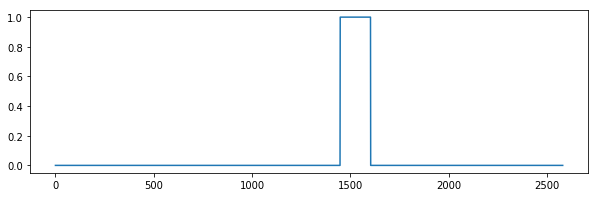

out = out[t-1]+prob* [0.94167227] - [0.61903962]
one time, n= 318619
times: 1 n= 318623 err: -0.0014037327740459985
LearningRate: 0.010000000063673948 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 161 ,True Neg= 2385 ,False Pos= 0 ,False Neg= 36
single layer: 
accuracy = 98.60573199070488 %
precision = 99.38271604938271 %
recall = 81.31313131313132 %
F-measure = 88.95216877748334 %


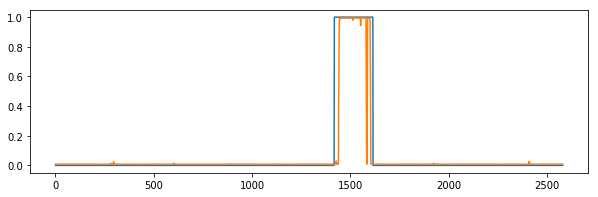

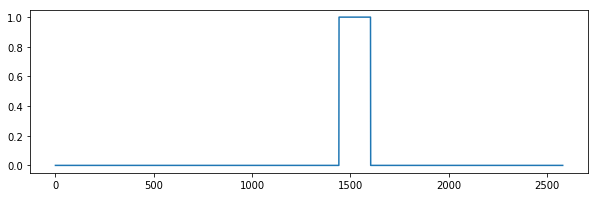

out = out[t-1]+prob* [0.98917014] - [0.57007477]
one time, n= 318644
Sxx.shape= (513, 2582)
t_begin= 1411 t_end= 1486
(2582, 40)


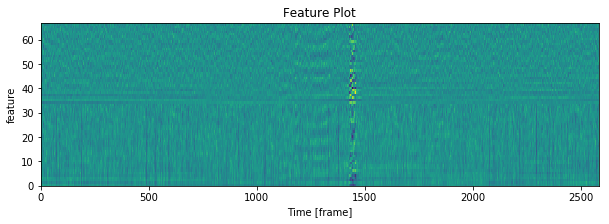

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 49 ,True Neg= 2507 ,False Pos= 0 ,False Neg= 26
single layer: 
accuracy = 98.99302865995352 %
precision = 98.0 %
recall = 64.47368421052632 %
F-measure = 77.30199613650997 %


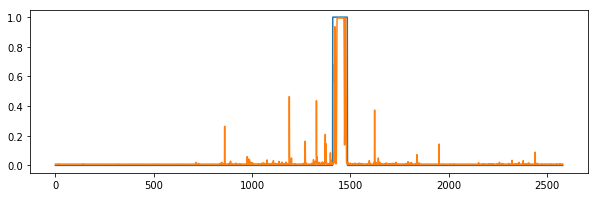

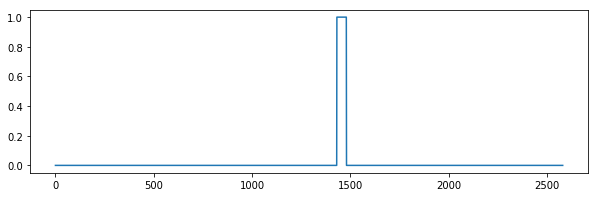

Current:event_tpos = 1 , event_fpos =  0 , event_fneg =  1
Total： event_tpos = 8 , event_fpos =  29 , event_fneg =  6
precision =  0.21563342318059298 recall =  0.5673758865248227 f_score =  0.27710965965305

###### same class train #######
Sxx.shape= (513, 2582)
(2582, 40)


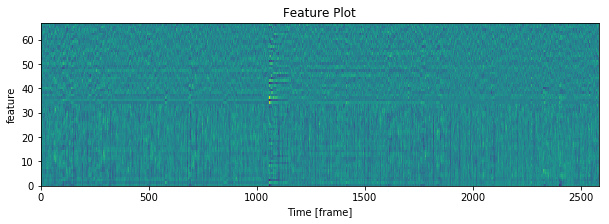

n = 318652 ,k updates! k =  101 New Sxx has length  2582
mixture_devtrain_babycry_101_766dc41e6f4fdd921a7cef3ebc61478d.wav
times: 1 n= 318652 err: -0.10320231085005079
LearningRate: 0.010000000012671276 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 0 ,True Neg= 2560 ,False Pos= 22 ,False Neg= 0
single layer: 
accuracy = 99.14794732765299 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


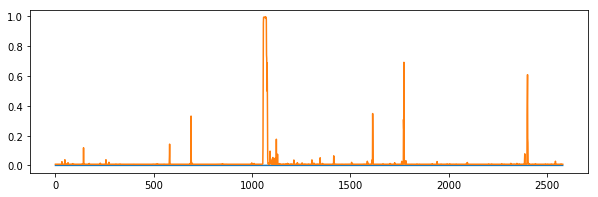

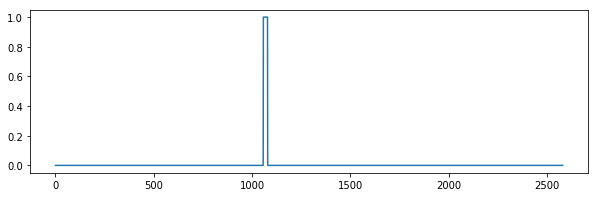

out = out[t-1]+prob* [0.9757906] - [0.58043709]
one time, n= 318661
Sxx.shape= (513, 2582)
t_begin= 592 t_end= 830
(2582, 40)


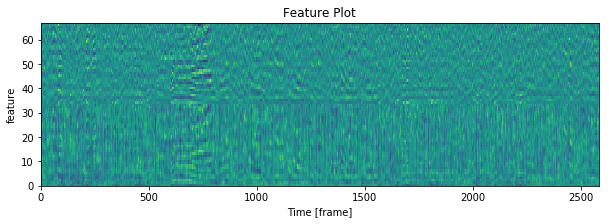

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 2344 ,False Pos= 0 ,False Neg= 238
single layer: 
accuracy = 90.78233927188226 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


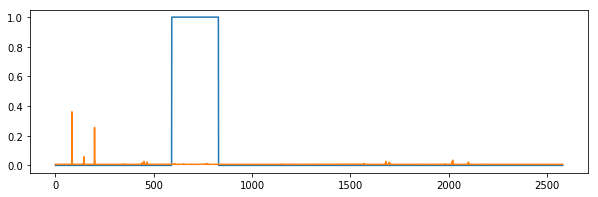

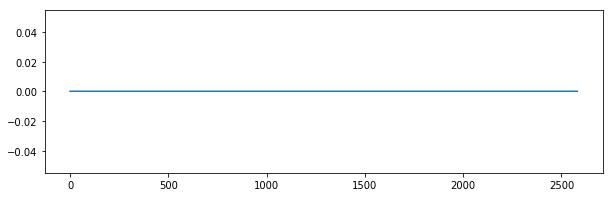

Current:event_tpos = 0 , event_fpos =  0 , event_fneg =  1
Total： event_tpos = 8 , event_fpos =  29 , event_fneg =  7
precision =  0.21563342318059298 recall =  0.5298013245033113 f_score =  0.270258286689146

###### Same class Train  #######
Sxx.shape= (513, 2582)
t_begin= 1762 t_end= 2022
(2320, 40)


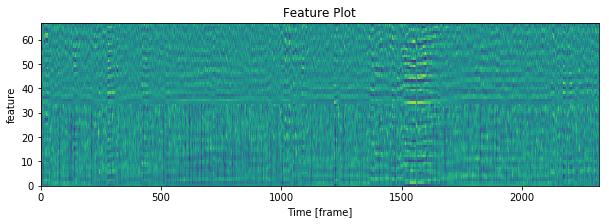

n = 318681 ,k updates! k =  358 New Sxx has length  2320
mixture_devtrain_babycry_358_21977766b3fb9541e3c652ba04c94f51.wav
times: 0 n= 318681 err: -0.0010654949220491958
LearningRate: 0.010000000063299378 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 0 ,True Neg= 2060 ,False Pos= 0 ,False Neg= 260
single layer: 
accuracy = 88.79310344827587 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


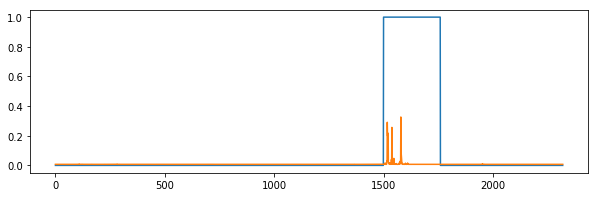

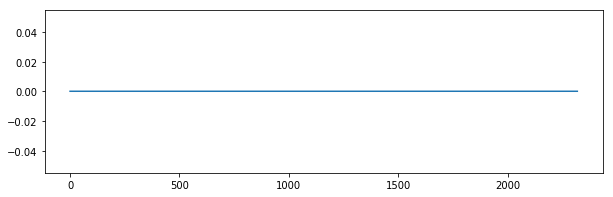

out = out[t-1]+prob* [0.95925606] - [0.5951435]
one time, n= 318704
times: 1 n= 318710 err: -0.009813391011141384
LearningRate: 0.010000000063299378 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 98 ,True Neg= 2060 ,False Pos= 0 ,False Neg= 162
single layer: 
accuracy = 93.01724137931035 %
precision = 98.98989898989899 %
recall = 37.547892720306514 %
F-measure = 54.04859364760194 %


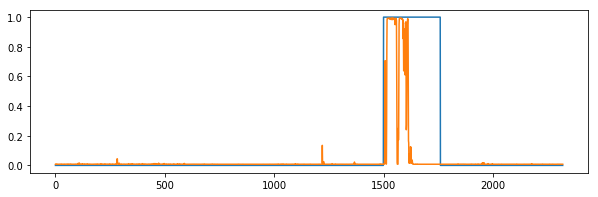

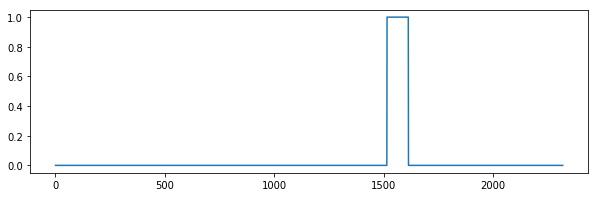

out = out[t-1]+prob* [0.97307496] - [0.58109018]
one time, n= 318727
Sxx.shape= (513, 2582)
t_begin= 2227 t_end= 2360
(1855, 40)


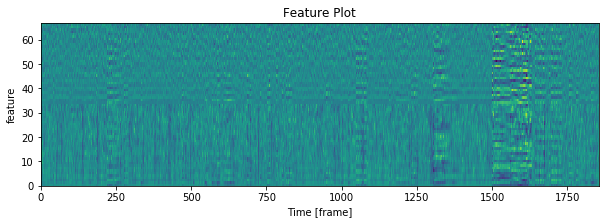

###### Test Set ######
(1855, 67)
(1855,)
True Pos= 126 ,True Neg= 1718 ,False Pos= 4 ,False Neg= 7
single layer: 
accuracy = 99.40700808625337 %
precision = 96.18320610687023 %
recall = 94.02985074626866 %
F-measure = 94.59701825145672 %


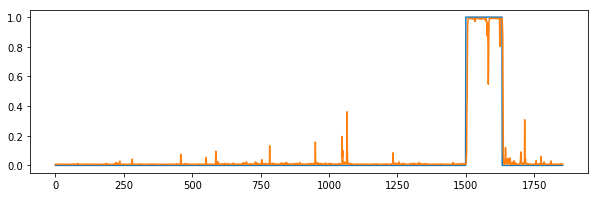

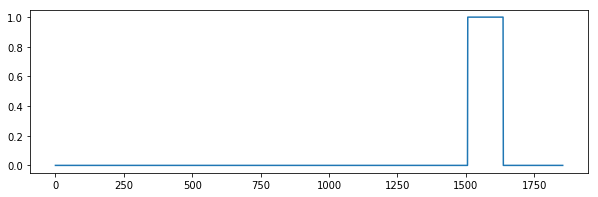

Current:event_tpos = 1 , event_fpos =  0 , event_fneg =  0
Total： event_tpos = 9 , event_fpos =  29 , event_fneg =  7
precision =  0.23622047244094488 recall =  0.5590062111801242 f_score =  0.29500620059329025

###### Same class Train  #######
Sxx.shape= (513, 2582)
t_begin= 1021 t_end= 1288
(2582, 40)


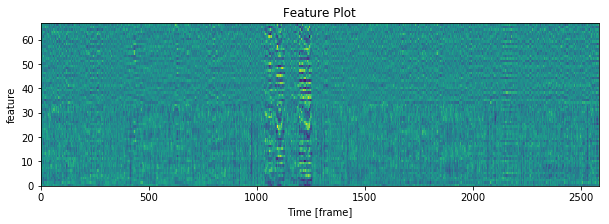

n = 318739 ,k updates! k =  62 New Sxx has length  2582
mixture_devtrain_babycry_062_f1316935e8ca28a7cca0445b014cf92d.wav
times: 0 n= 318739 err: -0.06157965919728699
LearningRate: 0.01000000006300887 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 144 ,True Neg= 2315 ,False Pos= 0 ,False Neg= 123
single layer: 
accuracy = 95.23625096824168 %
precision = 99.3103448275862 %
recall = 53.73134328358209 %
F-measure = 69.28096277016935 %


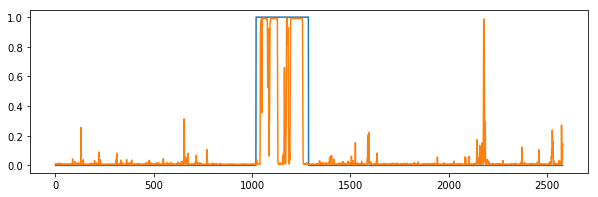

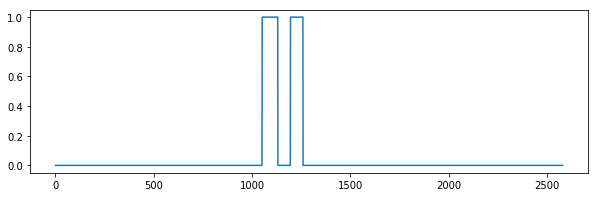

out = out[t-1]+prob* [0.94134388] - [0.59790555]
one time, n= 318764
times: 1 n= 318768 err: -0.006818791919550503
LearningRate: 0.01000000006300887 Dropout_threshold: 0.10000000022747682
###### Training Set ######
True Pos= 131 ,True Neg= 2315 ,False Pos= 0 ,False Neg= 136
single layer: 
accuracy = 94.73276529821844 %
precision = 99.24242424242425 %
recall = 48.88059701492538 %
F-measure = 65.06076533691628 %


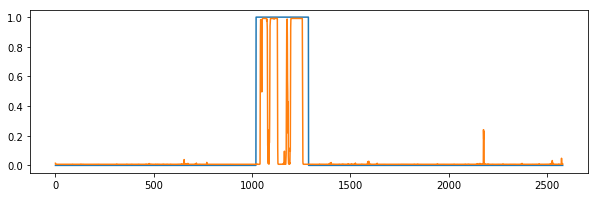

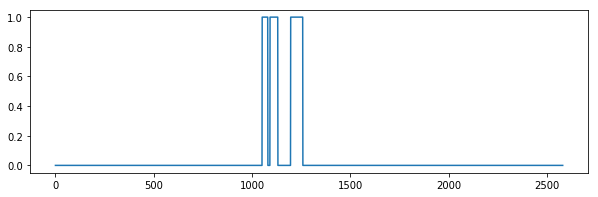

out = out[t-1]+prob* [0.94289065] - [0.58836916]
one time, n= 318789
Sxx.shape= (513, 2582)
(2582, 40)


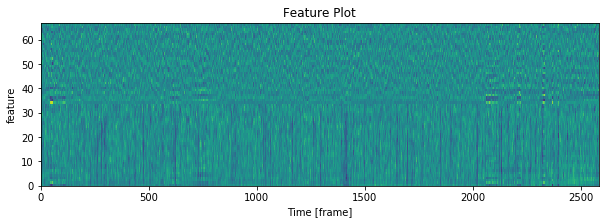

###### Test Set ######
(2582, 67)
(2582,)
True Pos= 0 ,True Neg= 2582 ,False Pos= 0 ,False Neg= 0
single layer: 
accuracy = 100.0 %
precision = 0.0 %
recall = 0.0 %
F-measure = 0.0 %


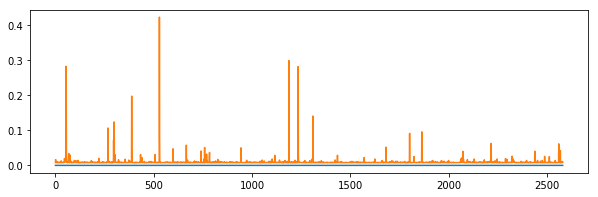

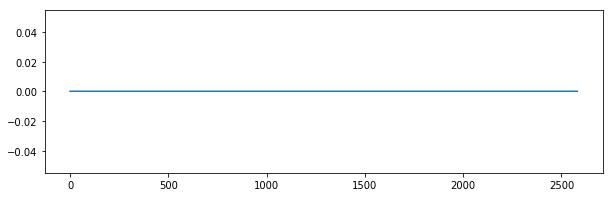

Current:event_tpos = 0 , event_fpos =  0 , event_fneg =  0
Total： event_tpos = 9 , event_fpos =  29 , event_fneg =  7
precision =  0.23622047244094488 recall =  0.5590062111801242 f_score =  0.29500620059329025

###### same class train #######
Sxx.shape= (513, 2582)
t_begin= 2095 t_end= 2357
(1987, 40)


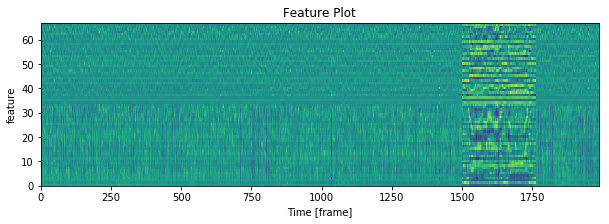

n = 318797 ,k updates! k =  110 New Sxx has length  1987
mixture_devtrain_babycry_110_faf286abe46dce9a0114a645f8560f3c.wav
times: 0 n= 318797 err: -0.0024866653009869293
LearningRate: 0.010000000062694612 Dropout_threshold: 0.10000000022747682
###### Training Set ######


KeyboardInterrupt: 

In [57]:
# DCASE Training
from os import listdir
from os.path import isfile, join
from IPython.display import clear_output

# Initialization
Sxx_spec,labels,fs = prep_from_yaml(train_data[0],train_audio_path,listen=0,noise=0,trunc=True,nperseg=1024, noverlap=512)          
Sxx_mfcc_raw       = Sxxin_to_mfcc(Sxx_spec,num_bank,fs,filter_bank)
features           = feature_for_sound(Sxx_mfcc_raw,num_bank,diff_by_time= False,diff= diff, diff_diff = diff_diff)
features           = mean_var_normalization(features,byRow = False)


plt.pcolormesh(features.T)
plt.title("Feature Plot")
plt.ylabel('feature')
plt.xlabel('Time [frame]')
plt.show()

# Hiearchical FF_LSTM_RNN
dropout_threshold = 0.1; double_fc = False;
R = hFFLSTMRNN(lenIn, lenOut, lenRec, sizeHidden, lenInRec,
               hiddenRec, features, labels, learningRate,dropout_threshold,double_fc); biDir = 0;lstm=1 

# single LSTM
#dropout_threshold = 0.1;
#R = myRNN(lenIn, lenOut, lenRec, sizeHidden, features, labels, learningRate,dropout_threshold); biDir = 0;lstm=1 

# bidir LSTM
#R = lstmRNN(lenIn, lenOut, lenRec, sizeHidden, features, labels, learningRate); biDir = 1;lstm=1 

# single RNN
#R = basicRNN(lenIn, lenOut, lenRec, sizeHidden, features, labels, learningRate); biDir = 0;lstm = 0 

# bidir RNN
#R = basicRNN(lenIn, lenOut, lenRec, sizeHidden, features, labels, learningRate); biDir = 1;lstm = 0 

n,k,training_count,position,time = 0,0,0,0,0;

# stat
margin = int(0.1*44100/512) # 100 ms margin is allowed for onset and offset mismatch
event_tpos, event_fpos, event_fneg = 0,0,0;
cross_training = 0


one_epoch = len(data)*features.shape[0]/lenRec;
print("One_epoch = ",one_epoch," iterations!")

while n<epoch*one_epoch:
    
    if((training_count % (1000)) == 0 and training_count > 0):
        clear_output();
        event_tpos, event_fpos, event_fneg = 0,0,0;
        print("Finish another 1,000 iterations!, now epoch = ",int(training_count/one_epoch));
        
        # adjust leanring rate
        R.learningRate = 0.01+0.09*np.exp(-training_count/(10*1000))
        R.dropout_threshold = 0.1+0.3*np.exp(-training_count/(10*1000))
        
    training_count += 1;

    if(position+lenRec+1 >= features.shape[0] or n == 0):
        #if((time > 50 and n > 100) or (time > 10 and n > 1000) or correctness > 0.95):
        position = 0
        if(n>0):
            print("one time, n=",n)
            time += 1;
        if(time > 1): # train each sample twice
            time = 0
            k = int(np.random.random()*len(train_data))
            if(k == len(train_data)):
                k = 0;
            
            n = int(1+n/29)*29
            
            if(n > 20*29):
                # Test 
                m = int(np.random.random()*len(test_data))
                Sxx_spec,labels,fs = prep_from_yaml(test_data[m],test_audio_path,\
                                                    listen=0,noise=0,trunc=True,nperseg=1024, noverlap=512)    
                Sxx_mfcc_raw = Sxxin_to_mfcc(Sxx_spec,num_bank,fs,filter_bank)
                test_features = feature_for_sound(Sxx_mfcc_raw,num_bank,\
                                                  diff_by_time= False,diff= diff, diff_diff = diff_diff)
                test_features = mean_var_normalization(test_features,byRow = False)
                
                plt.pcolormesh(test_features.T)
                plt.title("Feature Plot")
                plt.ylabel('feature')
                plt.xlabel('Time [frame]')
                plt.show()
                
                print("###### Test Set ######")
                print(test_features.shape)
                print(labels.shape)
                tpos, fpos, fneg = test_inference(test_features,labels,R,margin,listen=0,noise=0,biDir=biDir)
                event_tpos += tpos
                event_fpos += fpos
                event_fneg += fneg
                
                print("Current:event_tpos =",tpos,", event_fpos = ",fpos,", event_fneg = ",fneg)
                print("Total： event_tpos =",event_tpos,", event_fpos = ",event_fpos,", event_fneg = ",event_fneg)
                precision = event_tpos/(event_tpos+event_fpos+0.1) # prevent divide by zero
                recall    = event_tpos/(event_tpos+event_fneg+0.1)
                f_score   = 2*(precision*recall)/(precision+recall+0.1)
                print("precision = ",precision,"recall = ",recall,"f_score = ",f_score)
                
            if(int(np.random.random()*100) % 10 > 0):
                print("\n###### same class train #######")
                if(train_data[k]['event_present'] == False):
                    R.learningRate = 0.01+0.09*np.exp(-training_count/(10*1000))/5; # lower learning rate
                
                else:
                    R.learningRate = 0.01+0.09*np.exp(-training_count/(10*1000));
                    
                Sxx_spec,labels,fs = prep_from_yaml(train_data[k],train_audio_path,\
                                                        listen=0,noise=0,trunc=True,nperseg=1024, noverlap=512)  
                if(train_data[k]['event_present'] == False):
                    if(Sxx_spec.shape[0] > 1000):
                        position = Sxx_spec.shape[0]-1000
                    time += 1;
                cross_training = 0;
            else:
                if(training_count > 100*29):
                    print("\n###### Same class Train  #######")
                    R.learningRate = 0.01+0.09*np.exp(-training_count/(10*1000))
                    Sxx_spec,labels,fs = prep_from_yaml(train_data[k],train_audio_path,\
                                                        listen=0,noise=0,trunc=True,nperseg=1024, noverlap=512) 
                    cross_training = 0;
                else:
                    print("######### Cross class train #########")
                    Sxx_spec,_dummy,fs = prep_from_yaml(cross_train_data[k],cross_train_audio_path,\
                                                        listen=0,noise=0,trunc=True,nperseg=1024, noverlap=512)
                    R.learningRate = 0.01+0.09*np.exp(-training_count/(10*1000))/5
                    labels = np.zeros(Sxx_spec.shape[0])
                    if(Sxx_spec.shape[0] > 2000):
                        position = Sxx_spec.shape[0]-2000
                    time += 2;
                    cross_training = 1;
                    
            Sxx_mfcc_raw = Sxxin_to_mfcc(Sxx_spec,num_bank,fs,filter_bank)
            features = feature_for_sound(Sxx_mfcc_raw,num_bank,\
                                         diff_by_time= False,diff = diff, diff_diff = diff_diff)    
            features = mean_var_normalization(features,byRow = False)
            plt.pcolormesh(features.T)
            plt.title("Feature Plot")
            plt.ylabel('feature')
            plt.xlabel('Time [frame]')
            plt.show()
            print("n =",n,",k updates! k = ",k,"New Sxx has length ",features.shape[0])
            if(cross_training == 0):
                print(train_data[k]['mixture_audio_filename'])
            else:
                print(cross_train_data[k]['mixture_audio_filename'])
        if(biDir == 0):
            R.h = np.zeros_like(R.h)
            if(lstm != 0):
                R.c = np.zeros_like(R.c)
        else:
            R.hls_infer = np.zeros_like(R.hls_infer)
            R.hrs_infer = np.zeros_like(R.hrs_infer)
            if(lstm != 0):
                R.cls_infer = np.zeros_like(R.cls_infer)
                R.crs_infer = np.zeros_like(R.crs_infer)
      
    inputs   = features[position:position+lenRec]
    targets  = labels[position:position+lenRec]
    R.update_inputs_targets(inputs,targets)
    R.fwd_pass();
    
    err = R.bwd_pass();
    
    if(n%29 == 0 ): 
        print("times:",time,"n=",n,"err:",err)
        print("LearningRate:", R.learningRate,"Dropout_threshold:",R.dropout_threshold)
        print("###### Training Set ######")
        test_inference(features,labels,R,margin,listen=0,noise=0.0,biDir=biDir)
        print("out = out[t-1]+prob*",R.leaky_W,"-",R.leaky_b)
        
    position += lenRec;
    n += 1;

In [ ]:
# training - single class
from os import listdir
from os.path import isfile, join
from IPython.display import clear_output

train_scream = 0; # 0 is train gunshot

if(train_scream == 1):
    txtpath = "./audio_set/scream_text/"
    datpath = "./audio_set/scream_data/"
    cross_datpath = "./audio_set/gunshot/mix/"
else:
    txtpath = "./audio_set/gunshot/mix_text/"
    datpath = "./audio_set/gunshot/mix/"
    cross_datpath = "./audio_set/scream_data/"
    
txtfiles = [f for f in listdir(txtpath) if isfile(join(txtpath, f))]
print(txtfiles)

datfiles = [f for f in listdir(datpath) if isfile(join(datpath, f))]
print(datfiles)

cross_files = [f for f in listdir(cross_datpath) if isfile(join(cross_datpath, f))]
print(cross_files)

margin = int(0.1*5000/30) # 100 ms margin is allowed for onset and offset mismatch

# Initialization
Sxx_spec,labels,fs = audio_prep(datpath+datfiles[0],txtpath+txtfiles[0],\
                                plot=0,listen=0,noise=0,nperseg=512,noverlap=256)           
Sxx_mfcc_raw = Sxxin_to_mfcc(Sxx_spec,num_bank,fs,filter_bank)
Sxx_in = feature_for_sound(Sxx_mfcc_raw,num_bank)  
    
# Hiearchical FF_LSTM_RNN
dropout_threshold = 0.1; double_fc = 0;
R = hFFLSTMRNN(lenIn, lenOut, lenRec, sizeHidden, lenInRec,
               hiddenRec, Sxx_in, labels, learningRate,dropout_threshold,double_fc); biDir = 0;lstm=1 

# single LSTM
#dropout_threshold = 0.1;
#R = myRNN(lenIn, lenOut, lenRec, sizeHidden, Sxx_in, labels, learningRate,dropout_threshold); biDir = 0;lstm=1 

# bidir LSTM
#R = lstmRNN(lenIn, lenOut, lenRec, sizeHidden, Sxx_in, labels, learningRate); biDir = 1;lstm=1 

# single RNN
#R = basicRNN(lenIn, lenOut, lenRec, sizeHidden, Sxx_in, labels, learningRate); biDir = 0;lstm = 0 

# bidir RNN
#R = basicRNN(lenIn, lenOut, lenRec, sizeHidden, Sxx_in, labels, learningRate); biDir = 1;lstm = 0 

n,k,training_count,position,time,correctness = 0,0,0,0,0,0;


one_epoch = len(txtfiles)*10

while n<epoch*one_epoch:
    
    if((training_count % (one_epoch)) == 0 and training_count > 0):
        clear_output();
        print("Finish an epoch!, now epoch = ",int(training_count/one_epoch));
        
    training_count += 1;
    R.learningRate = 0.05+0.05*np.exp(-training_count/(100*1000))
    R.dropout_threshold = 0.7-0.65*np.exp(-training_count/(100*1000))
    
    if(position+lenRec+1 >= Sxx_in.shape[0] or n == 0):
        #if((time > 50 and n > 100) or (time > 10 and n > 1000) or correctness > 0.95):
        position = 0
        if(n>0):
            print("one time, n=",n)
            time += 1;
        if(time > 2):
            time = 0
            k = int(np.random.random()*len(txtfiles)/2)
            if(k == len(txtfiles)):
                k = 0;
            n = int(1+n/29)*29
            m = int(np.random.random()*len(cross_files))
            
            if(n > 20*29):
                Sxx_spec,labels,fs = audio_prep(datpath+datfiles[k],\
                                                txtpath+txtfiles[k],\
                                                plot=0,listen=0,noise=0.0,nperseg=512,noverlap=256)
                Sxx_mfcc_raw = Sxxin_to_mfcc(Sxx_spec,num_bank,fs,filter_bank)
                Sxx_in = feature_for_sound(Sxx_mfcc_raw,num_bank)
                
                print("###### test inference ######:",datfiles[k])
                print(Sxx_in.shape)
                print(labels.shape)
                test_inference(Sxx_in,labels,R,listen=0,noise=0,biDir=biDir)
                
            if(int(np.random.random()*100) % 10 > 0):
                print("###### same class train #######")
                Sxx_spec,labels,fs = audio_prep(datpath+datfiles[k],\
                                                txtpath+txtfiles[k],\
                                                plot=0,listen=0,noise=0,nperseg=512,noverlap=256)
                print("n =",n,",k updates! k = ",k,"New Sxx has length ",Sxx_in.shape[0])
                print(datpath+datfiles[k])
            else:
                if(training_count > 100*29):
                    print("###### same class train #######")
                    Sxx_spec,labels,fs = audio_prep(datpath+datfiles[k],\
                                                    txtpath+txtfiles[k],\
                                                    plot=0,listen=0,noise=0,nperseg=512,noverlap=256)
                    print("n =",n,",k updates! k = ",k,"New Sxx has length ",Sxx_in.shape[0])
                else:
                    print("######### cross class train #########")
                    cross_file_name = cross_datpath+cross_files[m]
                    Sxx_spec,labels,fs = cross_train_prep(cross_file_name,plot=0,listen=0,nperseg=512,noverlap=256)
                    if(Sxx_spec.shape[0] > 2000):
                        position = Sxx_spec.shape[0]-2000
                    time += 2;
                    
            Sxx_mfcc_raw = Sxxin_to_mfcc(Sxx_spec,num_bank,fs,filter_bank)
            Sxx_in = feature_for_sound(Sxx_mfcc_raw,num_bank)          
            
        if(biDir == 0):
            R.h = np.zeros_like(R.h)
            if(lstm != 0):
                R.c = np.zeros_like(R.c)
        else:
            R.hls_infer = np.zeros_like(R.hls_infer)
            R.hrs_infer = np.zeros_like(R.hrs_infer)
            if(lstm != 0):
                R.cls_infer = np.zeros_like(R.cls_infer)
                R.crs_infer = np.zeros_like(R.crs_infer)
      
    inputs  = Sxx_in[position:position+lenRec]
    targets  = labels[position:position+lenRec]

    R.update_inputs_targets(inputs,targets)
    R.fwd_pass();
    
    err = R.bwd_pass();
    
    if(n%29 == 0 ): # 113 is a prime number
        print("times:",time,"n=",n,"err:",err)
        print(" LearningRate:", R.learningRate,"Dropout_threshold:",R.dropout_threshold)
        test_inference(Sxx_in,labels,R,listen=0,noise=0.0,biDir=biDir)
        print("out = out[t-1]+prob*",R.leaky_W,"-",R.leaky_b)
    position += lenRec;
    
    n += 1;
    

In [ ]:
datfiles = "file_06001.wav"
txtfiles = "file_06.txt"
for i in range(0,5):
    test_inference("./audio_set/scream_data/"+datfiles,"./audio_set/scream_text/"+txtfiles,R,listen=0,noise=i/20)

In [ ]:
from os import listdir
from os.path import isfile, join
txtpath = "./audio_set/scream_text/"
datpath = "./audio_set/scream_data/"
txtfiles = [f for f in listdir(txtpath) if isfile(join(txtpath, f))]
print(txtfiles)
datfiles = [f for f in listdir(datpath) if isfile(join(datpath, f))]
print(datfiles)
for k in range(len(txtfiles)):
    print("./audio_set/scream_data/"+datfiles[k])
    Sxx,lb,fs = audio_prep("./audio_set/scream_data/"+datfiles[k],"./audio_set/scream_text/"+txtfiles[k],plot=0,listen=0,noise=0)
    plt.plot(lb)
    plt.ylabel("label\n")
    plt.show()

In [ ]:
datfiles = "file_32001.wav"
txtfiles = "file_32.txt"
Sxx,lb,fs = audio_prep("./audio_set/scream_data/"+datfiles,"./audio_set/scream_text/"+txtfiles,plot=0,listen=0,noise=0)
plt.plot(lb)
plt.ylabel("label\n\n")
plt.show()

In [ ]:
print("./audio_set/scream_data/"+datfiles[k])

In [ ]:
def cross_test_inference(Sxx_in,slabels,glabels,R_s,R_g,listen=0,noise=0,biDir=0):

    # result of each net
    result_s = []
    result_g = []
    
    # labels for each net
    compare_s = []
    compare_g = []
    
    count, p_false,n_false, p_correct,n_correct = 0,0,0,0,0;
    
    # value of leaky-integrator of each net
    is_scream = np.zeros(Sxx_in.shape[0]);
    is_gunshot= np.zeros(Sxx_in.shape[0]);
    
    # decision made by each net and final decision
    output_label_s = np.zeros_like(is_scream);
    output_label_g = np.zeros_like(is_gunshot);
    output_label = np.zeros_like(is_scream);
    
    # continuous frame of active result or inactive result for each net
    cont_count_s, cont_count_g = 0,0;
    is_same_s, is_same_g = 0,0;

    # gradient for W and b
    num_continuous = 10; # number of contiguous consistent frame to enable activation
    if(biDir == 0):
        # single layer
        for i in range(0,Sxx_in.shape[0]):  
            if(i > 0):
                is_scream[i] = is_scream[i-1];
                is_gunshot[i]= is_gunshot[i-1];
                output_label_s[i] = output_label_s[i-1];
                output_label_g[i] = output_label_g[i-1];
            if(is_scream[i] >= 1):
                is_scream[i] = 0.5;
            else:
                is_scream[i] *= is_scream[i]; # impact of last time fade out with rate proportional to value

            if(is_gunshot[i] >= 1):
                is_gunshot[i] = 0.5;
            else:
                is_gunshot[i] *= is_gunshot[i]; 
                
            infer_in_enc = Sxx_in[i]
            ret_s = R_s.get_prob(infer_in_enc)
            ret_g = R_g.get_prob(infer_in_enc)
            count += 1
            
            # Leaky integrator: y[i] = y[i-1]+x[i]*W-b 
            is_scream[i] += ret_s**2; # stronger the belief is, faster it increases
            is_gunshot[i]+= ret_g**2;

            
            if(is_scream[i] >= 0.5 and is_scream[i-1]>=0.5):
                is_same_s = 1;
            elif(is_scream[i] < 0.5 and is_scream[i-1] < 0.5):
                is_same_s = 1;
            else:
                is_same_s = 0;
            if(is_same_s == 1):
                cont_count_s += 1
            else:
                cont_count_s = 0; # if change is detected, reset cont_count
            if(cont_count_s == num_continuous):
                if(is_scream[i] >= 0.5):
                    for j in range(i-9,i+1):
                        output_label_s[j] = 1;
                else:
                    for j in range(i-9,i+1):
                        output_label_s[j] = 0;
                        
            if(is_gunshot[i] >= 0.5 and is_gunshot[i-1]>=0.5):
                is_same_g = 1;
            elif(is_gunshot[i] < 0.5 and is_gunshot[i-1] < 0.5):
                is_same_g = 1;
            else:
                is_same_g = 0;
            if(is_same_g == 1):
                cont_count_g += 1
            else:
                cont_count_g = 0; # if change is detected, reset cont_count
            if(cont_count_g == num_continuous):
                if(is_gunshot[i] >= 0.5):
                    for j in range(i-9,i+1):
                        output_label_g[j] = 1;
                else:
                    for j in range(i-9,i+1):
                        output_label_g[j] = 0;
            result_s.append(ret_s)
            result_g.append(ret_g)
            compare_s.append(slabels[i])
            compare_g.append(glabels[i])
            
            if(is_scream[i] <= 0):
                is_scream[i] = 0;
            elif(is_scream[i] > 1):
                is_scream[i] = 1;
            if(is_gunshot[i] <= 0):
                is_gunshot[i] = 0;
            elif(is_gunshot[i] > 1):
                is_gunshot[i] = 1;
            #plt.plot(R.h)
            #plt.show()
        for i in range(Sxx_in.shape[0]):
            if(output_label_s[i] > output_label_g[i]):
                output_label[i] = 1;
            elif(output_label_g[i] > output_label_s[i]):
                output_label[i] = 2;
            elif(output_label_g[i] == output_label_s[i] and output_label_s[i] == 1):
                if(is_scream[i] > is_gunshot[i]):
                    output_label[i] = 1;
                else:
                    output_label[i] = 2;
            else:
                output_label[i] = 0; # nothing
        
        

    else:
        # bi-directional
        while(ps+lenRec<Sxx_in.shape[0]):
            infer_in_enc  = Sxx_in[ps:ps+lenRec,:];
            ret = R.inference(infer_in_enc)     
            result.append(ret[:,1])
            count += ret.shape[0];
            for j in range(ret.shape[0]):
                if(abs(labels[ps:ps+j]-ret[j,1]) <= 0.5):
                    correct += 1;
            compare.append(list(labels[ps:ps+lenRec])[:])
            ps += lenRec
        compare = np.array(compare)
        compare = np.reshape(compare,(compare.shape[0]*compare.shape[1],1))
        result = np.array(result)
        result = np.reshape(result,(result.shape[0]*result.shape[1],1))
        print("biDir layer: correctness = ",correct/count*100,"%","correct=",correct,"count=",count)
        correctness = correct/count
    
    print("Ground True Labels")
    plt.plot(slabels+glabels*2)   
    plt.show()
    
    print("Scream Net")
    plt.plot(result_s)
    plt.plot(output_label_s)
    plt.show()
    
    print("Gunshot Net")
    plt.plot(result_g)
    plt.plot(output_label_g)   
    plt.show()
    
    print("Output")
    plt.plot(output_label)
    plt.show()

In [ ]:
def prep_for_both(gunshot_datpath,gunshot_datfiles,scream_datpath,scream_datfiles,k,num_bank,filter_bank):
    if(int(np.random.random()*1000) % 2 > 0):
        
        Sxx_spec,glabels,fs = audio_prep(gunshot_datpath+gunshot_datfiles[k],\
                                        gunshot_txtpath+gunshot_txtfiles[k],plot=0,listen=0,noise=0,nperseg=512,noverlap=256)
        print("GUNSHOT class train")
        print(gunshot_datpath+gunshot_datfiles[k])
        print("glabel shape",glabels.shape)
        slabels = np.zeros_like(glabels);
        print("slabel shape",slabels.shape)
        s_g = 1;
    else:
        
        Sxx_spec,slabels,fs = audio_prep(scream_datpath+scream_datfiles[k],\
                                        scream_txtpath+scream_txtfiles[k],plot=0,listen=0,noise=0,nperseg=512,noverlap=256)
        
        glabels = np.zeros_like(slabels);
        print("SCREAM class train")
        print(scream_datpath+scream_datfiles[k])
        print("glabel shape",glabels.shape)
        print("slabel shape",slabels.shape)
        s_g = 0; # scream
        
    
    Sxx_mfcc_raw = Sxxin_to_mfcc(Sxx_spec,num_bank,fs,filter_bank)
    Sxx_mfcc = Sxx_mfcc_raw[:,2:num_bank-4]
    Sxx_mfcc /= Sxx_mfcc.max()   
    Sxx_mfcc_diff = mfcc_difference(Sxx_mfcc)
    Sxx_in = np.hstack((Sxx_mfcc,Sxx_mfcc_diff))
    
    return Sxx_in, slabels, glabels, s_g

In [ ]:
epoch = 30*1000;
Sxx_spec,labels,fs = audio_prep("./audio_set/scream_data/file_00001.wav",\
                                "./audio_set/scream_text/file_00.txt",\
                                plot=1,listen=1,noise=0,nperseg=512,noverlap=256)

num_bank = 25
filter_bank = get_mfcc_filter_bank(Sxx_spec[0:1],num_bank,fs)

Sxx_mfcc_raw = Sxxin_to_mfcc(Sxx_spec,num_bank,fs,filter_bank)

# removing the static energy
Sxx_mfcc = Sxx_mfcc_raw[:,2:num_bank-4]
Sxx_mfcc /= Sxx_mfcc.max()
Sxx_mfcc_diff = mfcc_difference(Sxx_mfcc)
Sxx_spec = Sxx_spec[:, int(0.05*Sxx_spec.shape[1]):int(0.6*Sxx_spec.shape[1])]+1e-15
#Sxx_in = np.hstack((Sxx_spec,Sxx_mfcc,Sxx_mfcc_diff))

Sxx_in = np.hstack((Sxx_mfcc,Sxx_mfcc_diff))  

lenIn, lenOut, lenRec = Sxx_in.shape[1],2, min(150,max(min(100,Sxx_in.shape[0]),int(Sxx_in.shape[0]/10)))
sizeHidden, lenInRec, hiddenRec, numHiddenLayer = int(lenIn*1.5),Sxx_in.shape[1]-Sxx_mfcc_diff.shape[1], int(lenIn*0.75), 1;
learningRate = 0.1;
print("length of Input =",lenIn, "\nlength of Out =",lenOut,"\nInput that goes to Rec neurons =",lenInRec,"\nnum of Recurrent neurons=",hiddenRec,"\nRecurrent Times=",lenRec)

In [ ]:
#Train both classes
from os import listdir
from os.path import isfile, join
from IPython.display import clear_output

scream_txtpath = "./audio_set/scream_text/"
scream_datpath = "./audio_set/scream_data/"
gunshot_txtpath = "./audio_set/gunshot/mix_text/"
gunshot_datpath = "./audio_set/gunshot/mix/"
    
gunshot_txtfiles = [f for f in listdir(gunshot_txtpath) if isfile(join(gunshot_txtpath, f))]
print(gunshot_txtfiles)

gunshot_datfiles = [f for f in listdir(gunshot_datpath) if isfile(join(gunshot_datpath, f))]
print(gunshot_datfiles)

scream_txtfiles = [f for f in listdir(scream_txtpath) if isfile(join(scream_txtpath, f))]
print(scream_txtfiles)

scream_datfiles = [f for f in listdir(scream_datpath) if isfile(join(scream_datpath, f))]
print(scream_datfiles)

# Initialization
Sxx_in, slabels, glabels, s_g = prep_for_both(gunshot_datpath,gunshot_datfiles,\
                                                          scream_datpath,scream_datfiles,0,num_bank,filter_bank);
            
# Hiearchical FF_LSTM_RNN
dropout_threshold = 0.1; double_fc = 0;
R_s = hFFLSTMRNN(lenIn, lenOut, lenRec, sizeHidden, lenInRec,
               hiddenRec, Sxx_in, slabels, learningRate,dropout_threshold,double_fc); biDir = 0;lstm=1 

R_g = hFFLSTMRNN(lenIn, lenOut, lenRec, sizeHidden, lenInRec,
               hiddenRec, Sxx_in, glabels, learningRate,dropout_threshold,double_fc); biDir = 0;lstm=1 

# single LSTM
#dropout_threshold = 0.1;
#R = myRNN(lenIn, lenOut, lenRec, sizeHidden, Sxx_in, labels, learningRate,dropout_threshold); biDir = 0;lstm=1 

# bidir LSTM
#R = lstmRNN(lenIn, lenOut, lenRec, sizeHidden, Sxx_in, labels, learningRate); biDir = 1;lstm=1 

# single RNN
#R = basicRNN(lenIn, lenOut, lenRec, sizeHidden, Sxx_in, labels, learningRate); biDir = 0;lstm = 0 

# bidir RNN
#R = basicRNN(lenIn, lenOut, lenRec, sizeHidden, Sxx_in, labels, learningRate); biDir = 1;lstm = 0 

# leaky integrator
W_g, W_s, b_g, b_s = 0,0,0,0;

n,k,training_count,position,time,correctness = 0,0,0,0,0,0;

errs, errg = 0,0;

one_epoch = len(gunshot_txtfiles)

while n<epoch*one_epoch:
    
    if((training_count % one_epoch) == 0 and training_count > 0):
        clear_output();
        print("Finish an epoch!, now epoch = ",int(training_count/one_epoch));
    
    
    R_s.learningRate = 0.05+0.05*np.exp(-training_count/(100*100))
    R_s.dropout_threshold = 0.7-0.65*np.exp(-training_count/(100*100))
    R_g.learningRate = 0.05+0.05*np.exp(-training_count/(100*100))
    R_g.dropout_threshold = 0.7-0.65*np.exp(-training_count/(100*100)) 
    
    if(position+lenRec+1 >= Sxx_in.shape[0] or n == 0 or n > 2000):
        #if((time > 50 and n > 100) or (time > 10 and n > 1000) or correctness > 0.95):
        if((time > 1) or correctness > 0.95):
            
            k = int(np.random.random()*len(gunshot_txtfiles)/2)
            if(k == len(gunshot_txtfiles)):
                k = 0;
            n = int(1+n/113)*113
            training_count += 1;
            if(n > 20*113):
                
                Sxx_in, slabels, glabels, s_g = prep_for_both(gunshot_datpath,gunshot_datfiles,\
                                                          scream_datpath,scream_datfiles,k,num_bank,filter_bank);
                print("///////////////before training -- Validation test: ///////////////")
                if(s_g == 1):
                    print("Training Gunsound")
                else:
                    print("Training Scream")
                cross_test_inference(Sxx_in,slabels,glabels,R_s,R_g,listen=0,noise=0.0,biDir=biDir)  
            else:
                Sxx_in, slabels, glabels, s_g = prep_for_both(gunshot_datpath,gunshot_datfiles,\
                                                          scream_datpath,scream_datfiles,k,num_bank,filter_bank);
     
            time = 0
            correctness = 0
            
        if(biDir == 0):
            R_s.h = np.zeros_like(R_s.h)
            R_g.h = np.zeros_like(R_g.h)
            if(lstm != 0):
                R_s.c = np.zeros_like(R_s.c)
                R_g.c = np.zeros_like(R_g.c)
        else:
            R_s.hls_infer = np.zeros_like(R_s.hls_infer)
            R_s.hrs_infer = np.zeros_like(R_s.hrs_infer)
            R_g.hls_infer = np.zeros_like(R_g.hls_infer)
            R_g.hrs_infer = np.zeros_like(R_g.hrs_infer)
            if(lstm != 0):
                R_s.cls_infer = np.zeros_like(R_s.cls_infer)
                R_s.crs_infer = np.zeros_like(R_s.crs_infer)
                R_g.cls_infer = np.zeros_like(R_g.cls_infer)
                R_g.crs_infer = np.zeros_like(R_g.crs_infer)
        position = 0;
        time += 1;
        
    inputs  = Sxx_in[position:position+lenRec]
    stargets  = slabels[position:position+lenRec]
    gtargets  = glabels[position:position+lenRec]

    
    R_g.update_inputs_targets(inputs,gtargets)
    R_s.update_inputs_targets(inputs,stargets)
    if(s_g == 1):        
        R_g.fwd_pass();
        errg = R_g.bwd_pass();
        # occasionally train the other net
        if(int(np.random.random()*100) % 2 > 0):
            R_s.fwd_pass(); 
            errs = R_s.bwd_pass();
    else:       
        R_s.fwd_pass(); 
        errs = R_s.bwd_pass();
        if(int(np.random.random()*100) % 2 > 0):
            R_g.fwd_pass(); 
            errg = R_g.bwd_pass();
            
    if(n%(113) == 0 ): # 113 is a prime number
        print("times:",time,"n=",n,"err_s:",errs,"err_g:",errg)
        print(" LearningRate:", R_s.learningRate,"Dropout_threshold:",R_s.dropout_threshold)
        print("///////////////After train: ////////////////")
        W_g, W_s, b_g, b_s = cross_test_inference(Sxx_in,slabels,glabels,R_s,R_g,W_g, W_s, b_g, b_s,listen=0,noise=0.0,biDir=biDir)  
        
    position += lenRec;
    n += 1;
    

SyntaxError: illegal expression for augmented assignment (<ipython-input-13-1491e1cbb7c5>, line 2)